# Exploratory Data Analysis For San Francisco Crime Classification
Yang Yang Qian

https://www.kaggle.com/c/sf-crime

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

%reload_ext autoreload
%autoreload 2
from src.features.build_features import DataFrameSelector, SFCCTransformer, print_summary

# Load Data

In [2]:
train_pd = pd.read_csv("../data/raw/train.csv.zip", compression="zip")
test_pd = pd.read_csv("../data/raw/test.csv.zip", compression="zip")
sample_submissions = pd.read_csv("../data/raw/sampleSubmission.csv.zip", compression="zip")

In [3]:
# extract some more features using our custom transformer

sfcc = SFCCTransformer()

pipe = Pipeline([
    ("transformer", sfcc)
])

train_pd = pipe.transform(train_pd)
test_pd = pipe.transform(test_pd)

# Macro

In [4]:
print(train_pd.shape)
print(test_pd.shape)

(878049, 22)
(884262, 20)


In [5]:
train_pd.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  hour_delta     ...      month_delta  year_delta  \
0 -122.425892  37.774599      108263     ...              148          12   
1 -122.425892  37.774599      108263     ...              148          12   
2 -122.424363  37.800414      108263     ...              148          12   
3 -122.426995  37.800873      108263     ...              148          12   
4 -122.438738  37.771541      108263     ...              148          12   

   hour_of_day  day_of_month  week_of_year  month_of_year  quarter_of_year  \
0           23            13            20              5                2   
1           23            13            20              5                2   
2           23            13            20              5                2   
3           23            13            20              5                2   
4           23            13            20              5                2   

   year  is_weekend  is_holiday  
0  2015           0           0  
1  2015           0           0  
2  2015           0           0  
3  2015           0           0  
4  2015           0           0  

[5 rows x 22 columns]

In [6]:
test_pd.head()

Id                Dates DayOfWeek PdDistrict                   Address  \
0   0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  hour_delta  day_delta  week_delta  month_delta  \
0 -122.399588  37.735051      108311       4512         644          148   
1 -122.391523  37.732432      108311       4512         644          148   
2 -122.426002  37.792212      108311       4512         644          148   
3 -122.437394  37.721412      108311       4512         644          148   
4 -122.437394  37.721412      108311       4512         644          148   

   year_delta  hour_of_day  day_of_month  week_of_year  month_of_year  \
0          12           23            10            19              5   
1          12           23            10            19              5   
2          12           23            10            19              5   
3          12           23            10            19              5   
4          12           23            10            19              5   

   quarter_of_year  year  is_weekend  is_holiday  
0                2  2015           1           0  
1                2  2015           1           0  
2                2  2015           1           0  
3                2  2015           1           0  
4                2  2015           1           0

In [30]:
print_summary(train_pd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 22 columns):
Dates              878049 non-null object
Category           878049 non-null object
Descript           878049 non-null object
DayOfWeek          878049 non-null object
PdDistrict         878049 non-null object
Resolution         878049 non-null object
Address            878049 non-null object
X                  878049 non-null float64
Y                  878049 non-null float64
hour_delta         878049 non-null int32
day_delta          878049 non-null int32
week_delta         878049 non-null int32
month_delta        878049 non-null int32
year_delta         878049 non-null int32
hour_of_day        878049 non-null int64
day_of_month       878049 non-null int64
week_of_year       878049 non-null int64
month_of_year      878049 non-null int64
quarter_of_year    878049 non-null int64
year               878049 non-null int64
is_weekend         878049 non-null int64
is_holiday       

In [32]:
print_summary(test_pd)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 20 columns):
Id                 884262 non-null int64
Dates              884262 non-null object
DayOfWeek          884262 non-null object
PdDistrict         884262 non-null object
Address            884262 non-null object
X                  884262 non-null float64
Y                  884262 non-null float64
hour_delta         884262 non-null int32
day_delta          884262 non-null int32
week_delta         884262 non-null int32
month_delta        884262 non-null int32
year_delta         884262 non-null int32
hour_of_day        884262 non-null int64
day_of_month       884262 non-null int64
week_of_year       884262 non-null int64
month_of_year      884262 non-null int64
quarter_of_year    884262 non-null int64
year               884262 non-null int64
is_weekend         884262 non-null int64
is_holiday         884262 non-null int32
dtypes: float64(2), int32(6), int64(8), object(4)
memory usag

 # Univariate

## Category

* categorical variable with 39 levels
* is what we are trying to predict
* most of the crimes is theft, at around 20% of all crime

In [8]:
train_pd.Category.value_counts()[0:5]

LARCENY/THEFT     174900
OTHER OFFENSES    126182
NON-CRIMINAL       92304
ASSAULT            76876
DRUG/NARCOTIC      53971
Name: Category, dtype: int64

In [25]:
train_pd.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [24]:
len(train_pd.Category.unique())

39

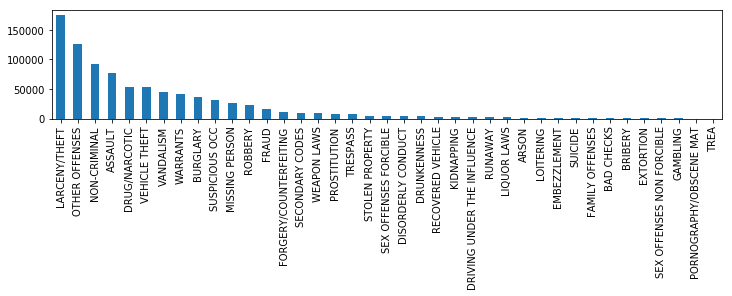

In [18]:
_ = train_pd.Category.value_counts().plot(kind = "bar", figsize = (12,2))

In [41]:
np.divide(train_pd.Category.value_counts(), train_pd.shape[0])

LARCENY/THEFT                  0.199192
OTHER OFFENSES                 0.143707
NON-CRIMINAL                   0.105124
ASSAULT                        0.087553
DRUG/NARCOTIC                  0.061467
VEHICLE THEFT                  0.061251
VANDALISM                      0.050937
WARRANTS                       0.048077
BURGLARY                       0.041860
SUSPICIOUS OCC                 0.035777
MISSING PERSON                 0.029599
ROBBERY                        0.026194
FRAUD                          0.018996
FORGERY/COUNTERFEITING         0.012082
SECONDARY CODES                0.011372
WEAPON LAWS                    0.009743
PROSTITUTION                   0.008523
TRESPASS                       0.008343
STOLEN PROPERTY                0.005171
SEX OFFENSES FORCIBLE          0.004997
DISORDERLY CONDUCT             0.004920
DRUNKENNESS                    0.004874
RECOVERED VEHICLE              0.003574
KIDNAPPING                     0.002666
DRIVING UNDER THE INFLUENCE    0.002583


## PdDistrict

* categorical variable with 10 levels
* should be roughly correlated with X and Y ?
* southern district appears to have the highest number of reported crimes. Maybe larger district? more cops? or just more crime?

In [31]:
train_pd.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [32]:
len(train_pd.PdDistrict.unique())

10

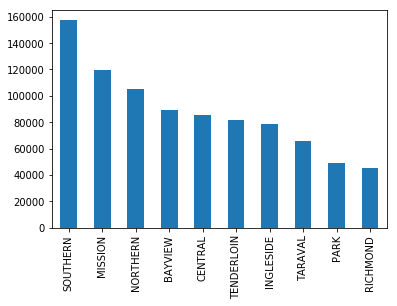

In [66]:
_ = train_pd.PdDistrict.value_counts().plot(kind = "bar")

## Address

* might be able to extract street from this
* probably correlated with X and Y

In [34]:
train_pd.Address.value_counts()[0:5]

800 Block of BRYANT ST      26533
800 Block of MARKET ST       6581
2000 Block of MISSION ST     5097
1000 Block of POTRERO AV     4063
900 Block of MARKET ST       3251
Name: Address, dtype: int64

In [35]:
train_pd.Address.unique()

array(['OAK ST / LAGUNA ST', 'VANNESS AV / GREENWICH ST',
       '1500 Block of LOMBARD ST', ..., '300 Block of JOHN F KENNEDY DR',
       'FOLSOM ST / ZENO PL', '1000 Block of 22ND AV'], dtype=object)

In [36]:
len(train_pd.Address.unique())

23228

## X

* longitude
* appears to have some outliers, maybe some mis-coded locations?

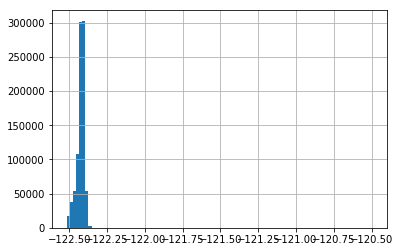

In [54]:
_ = train_pd.X.hist(bins = 100)

In [51]:
train_pd.query("X > -122.25").shape

(67, 9)

In [53]:
train_pd.query("X > -122.25").head()

Dates        Category  \
660485  2005-12-30 17:00:00   LARCENY/THEFT   
660711  2005-12-30 00:34:00         ASSAULT   
660712  2005-12-30 00:34:00         ASSAULT   
661106  2005-12-29 00:07:00    NON-CRIMINAL   
666430  2005-11-30 11:25:00  OTHER OFFENSES   

                                    Descript  DayOfWeek  PdDistrict  \
660485          GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711           INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712  AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106          AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                     TRAFFIC VIOLATION  Wednesday  TENDERLOIN   

               Resolution                          Address      X     Y  
660485               NONE      5THSTNORTH ST / OFARRELL ST -120.5  90.0  
660711     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
660712     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
661106  PSYCHOPATHIC CASE          5THSTNORTH ST / EDDY ST -120.5  90.0  
666430      ARREST, CITED         5THSTNORTH ST / ELLIS ST -120.5  90.0

## Y

* lattitude
* appears to have some outliers, maybe some mis-coded locations?

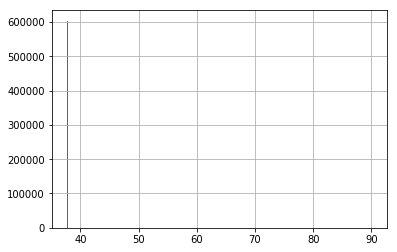

In [58]:
_ = train_pd.Y.hist(bins = 1000)

In [59]:
train_pd.query("Y > 50").shape

(67, 9)

In [60]:
train_pd.query("Y > 50").head()

Dates        Category  \
660485  2005-12-30 17:00:00   LARCENY/THEFT   
660711  2005-12-30 00:34:00         ASSAULT   
660712  2005-12-30 00:34:00         ASSAULT   
661106  2005-12-29 00:07:00    NON-CRIMINAL   
666430  2005-11-30 11:25:00  OTHER OFFENSES   

                                    Descript  DayOfWeek  PdDistrict  \
660485          GRAND THEFT FROM LOCKED AUTO     Friday  TENDERLOIN   
660711           INFLICT INJURY ON COHABITEE     Friday     BAYVIEW   
660712  AGGRAVATED ASSAULT WITH BODILY FORCE     Friday     BAYVIEW   
661106          AIDED CASE, MENTAL DISTURBED   Thursday  TENDERLOIN   
666430                     TRAFFIC VIOLATION  Wednesday  TENDERLOIN   

               Resolution                          Address      X     Y  
660485               NONE      5THSTNORTH ST / OFARRELL ST -120.5  90.0  
660711     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
660712     ARREST, BOOKED  JAMESLICKFREEWAY HY / SILVER AV -120.5  90.0  
661106  PSYCHOPATHIC CASE          5THSTNORTH ST / EDDY ST -120.5  90.0  
666430      ARREST, CITED         5THSTNORTH ST / ELLIS ST -120.5  90.0

## DayOfWeek

* categorical variable with 7 levels
* looks like number of reported crimes is highest on Friday for some reason
* highest vs lowest is about 12% decrease 

In [62]:
train_pd.DayOfWeek.unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [63]:
train_pd.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

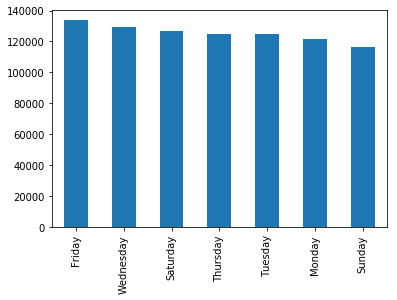

In [65]:
_ = train_pd.DayOfWeek.value_counts().plot(kind = "bar")

## Dates

* a date and time value, which maybe we can split into components, e.g.
    + date
    + hour of day
    + am vs pm
    + weekends vs weekdays
* maybe can also transform into other date-and-time-related features, e.g.
    + police shift
    + day and police shift

In [67]:
train_pd.Dates.unique()

array(['2015-05-13 23:53:00', '2015-05-13 23:33:00',
       '2015-05-13 23:30:00', ..., '2003-01-06 00:20:00',
       '2003-01-06 00:15:00', '2003-01-06 00:01:00'], dtype=object)

## Descript

* not very useful for prediction classification task
* not available in Test data
* a categorical variable with lots of levels

In [9]:
train_pd.Descript.value_counts()[0:5]

GRAND THEFT FROM LOCKED AUTO             60022
LOST PROPERTY                            31729
BATTERY                                  27441
STOLEN AUTOMOBILE                        26897
DRIVERS LICENSE, SUSPENDED OR REVOKED    26839
Name: Descript, dtype: int64

In [43]:
train_pd.Descript.unique()[0:10]

array(['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO',
       'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'FOUND PROPERTY',
       'ROBBERY, ARMED WITH A KNIFE'], dtype=object)

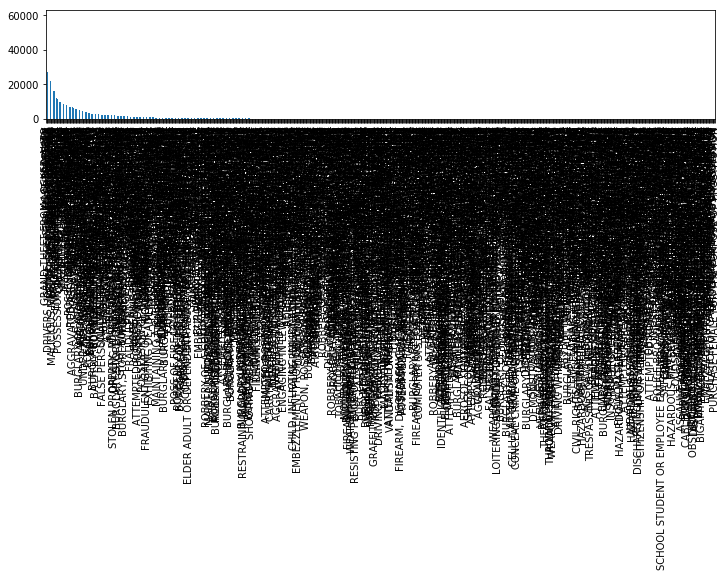

In [19]:
_ = train_pd.Descript.value_counts().plot(kind = "bar", figsize = (12,2))

## Resolution

* not available in Test data
* not very useful for prediction classification task

In [26]:
train_pd.Resolution.unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

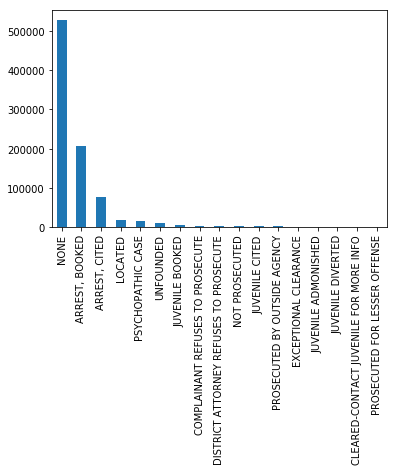

In [27]:
train_pd.Resolution.value_counts().plot(kind = "bar")

# Multivariate

## X and Y

* the outliers in X and Y might be miss-coded
* if we eliminate them, the shape of the city becomes more apparent

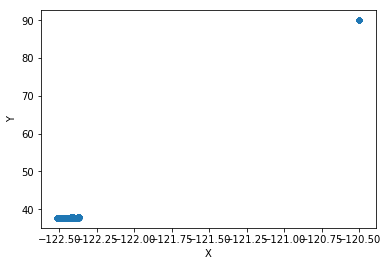

In [71]:
_ = train_pd[["X", "Y"]].plot(kind = "scatter", x = "X", y = "Y")

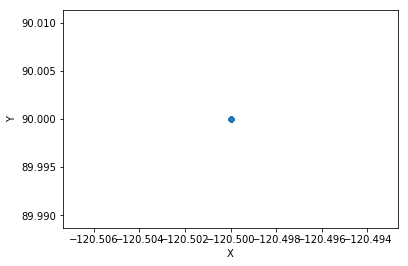

In [73]:
_ = train_pd[["X", "Y"]].query("Y >= 50").plot(kind = "scatter", x = "X", y = "Y")

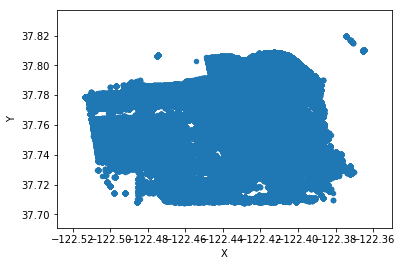

In [74]:
_ = train_pd[["X", "Y"]].query("Y < 50").plot(kind = "scatter", x = "X", y = "Y")

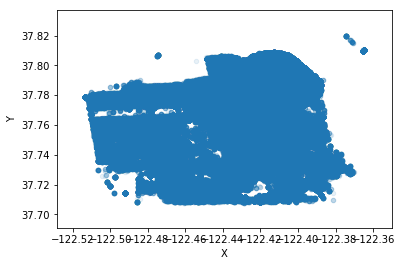

In [75]:
_ = train_pd[["X", "Y"]].query("Y < 50").plot(kind = "scatter", x = "X", y = "Y", alpha = 0.1)

There are definitely crime "hotspots"

* some crimes are so common that we need to use hexbin to better see what is going on

WARRANTS


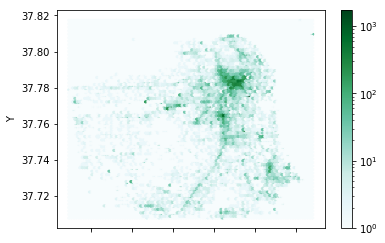

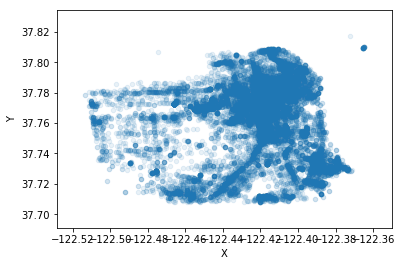

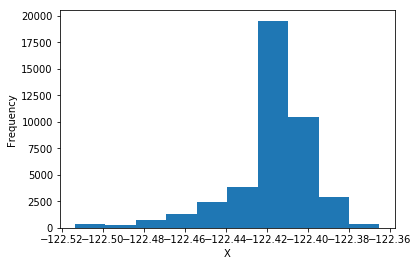

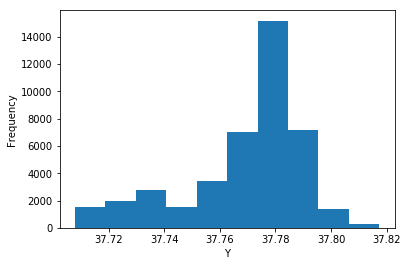

OTHER OFFENSES


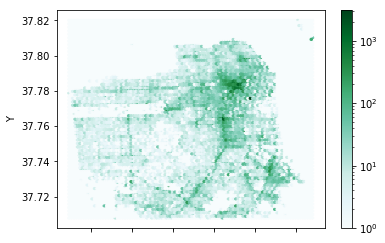

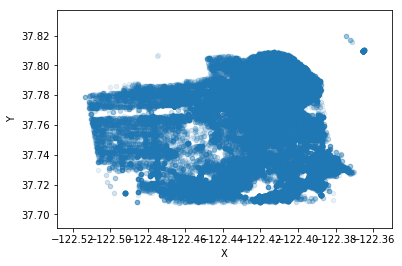

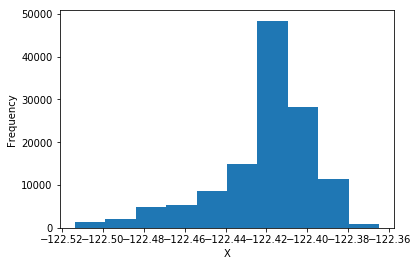

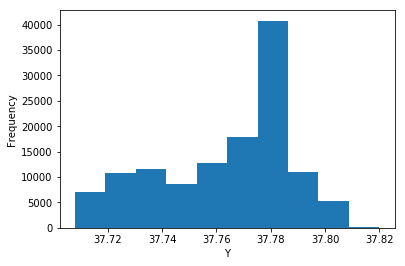

LARCENY/THEFT


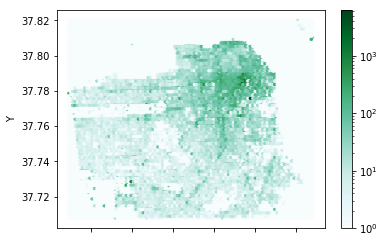

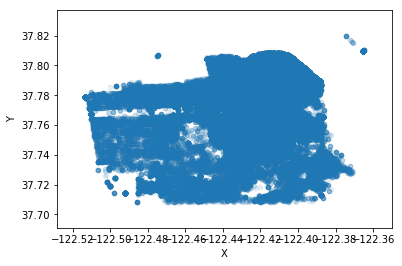

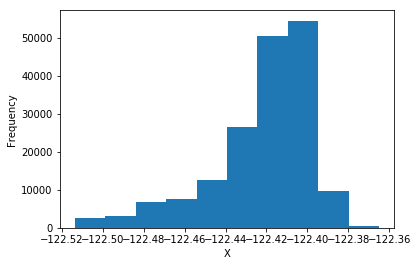

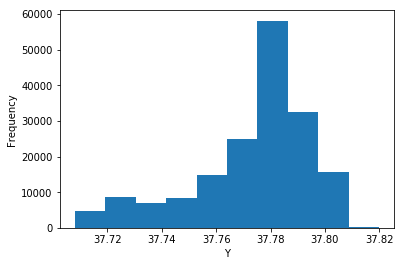

VEHICLE THEFT


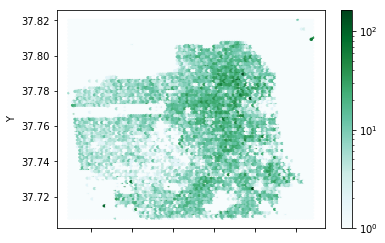

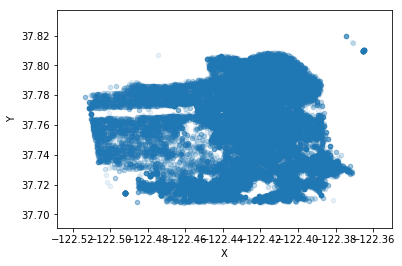

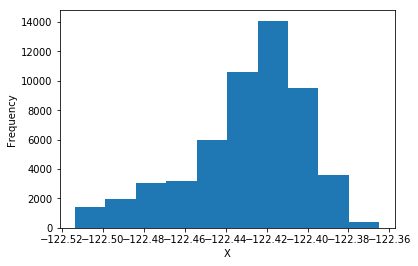

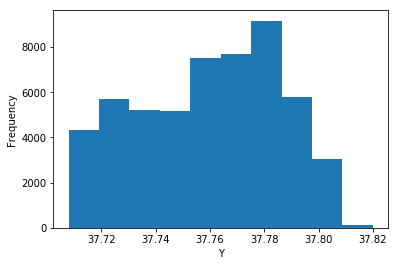

VANDALISM


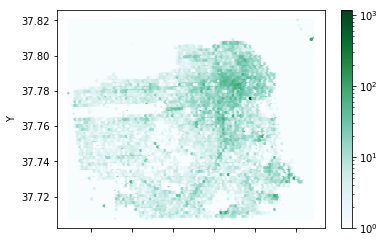

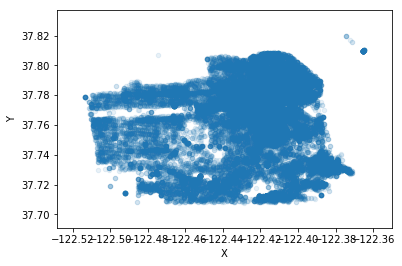

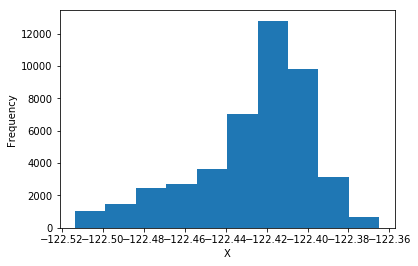

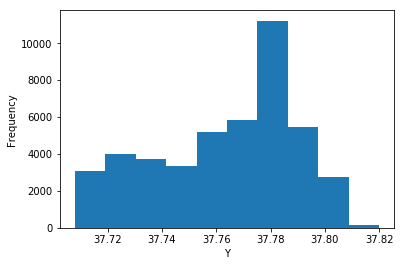

NON-CRIMINAL


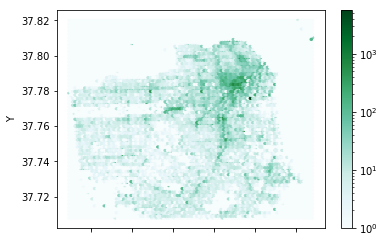

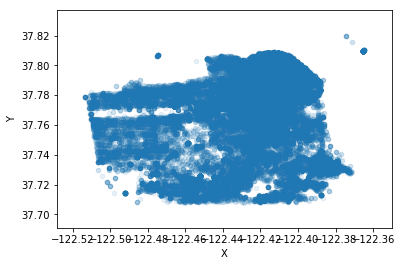

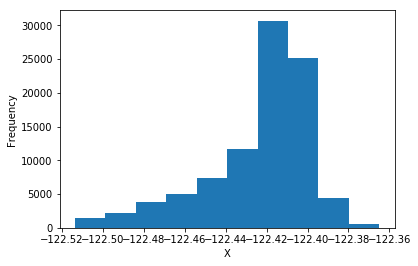

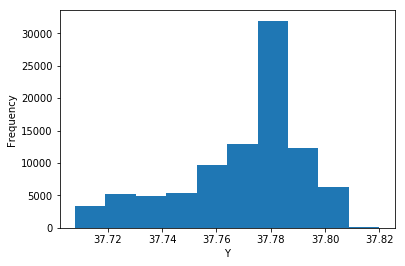

ROBBERY


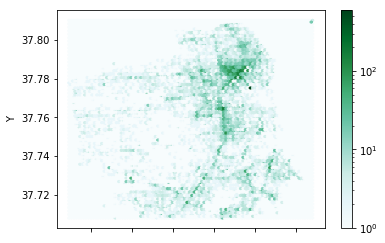

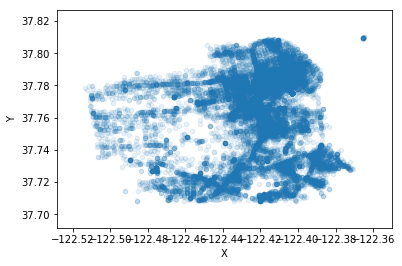

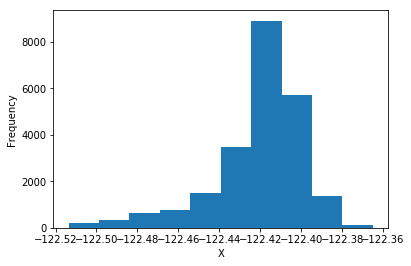

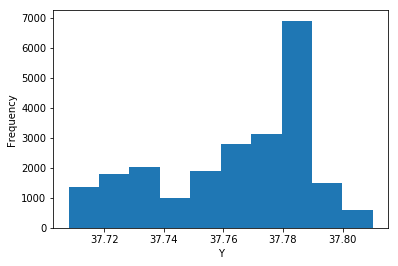

ASSAULT


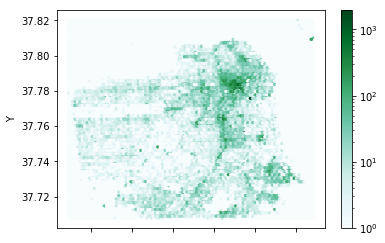

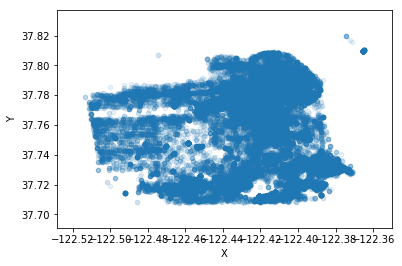

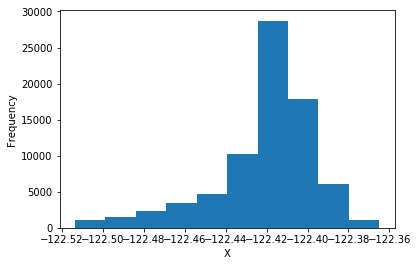

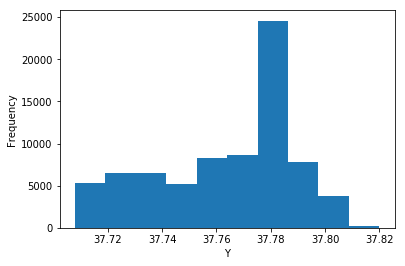

WEAPON LAWS


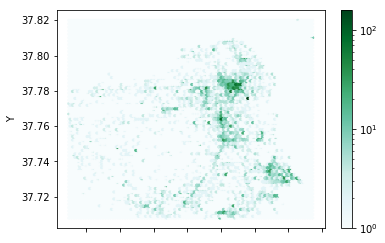

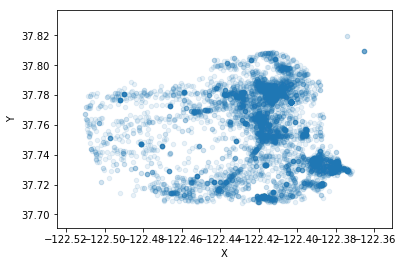

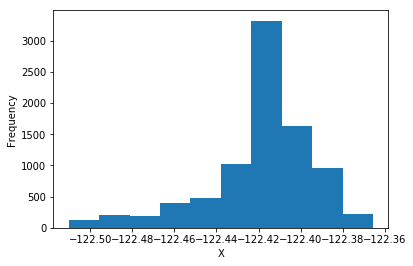

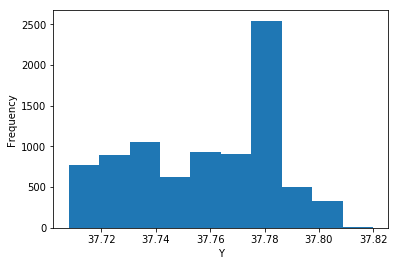

BURGLARY


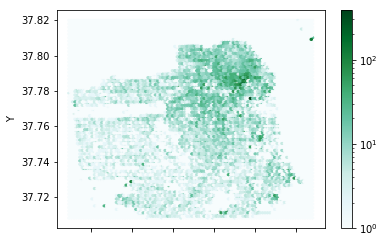

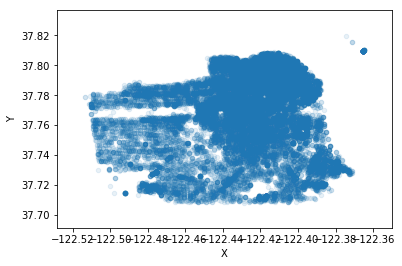

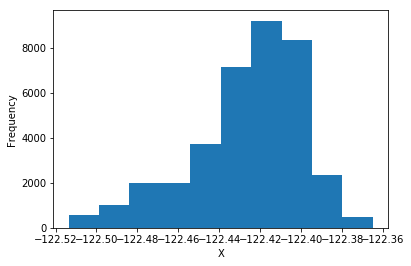

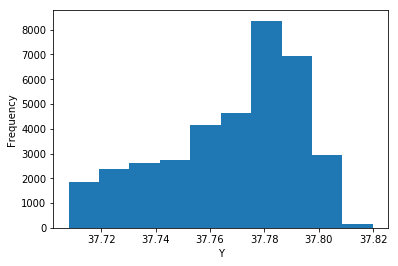

SUSPICIOUS OCC


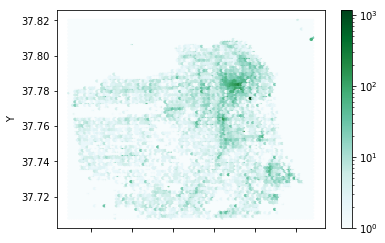

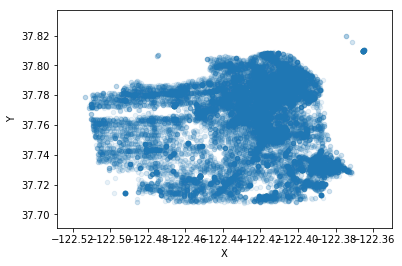

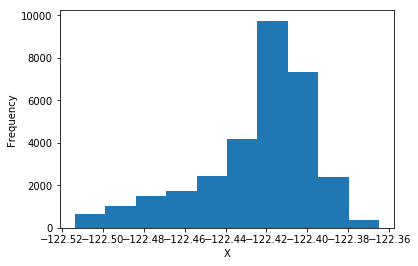

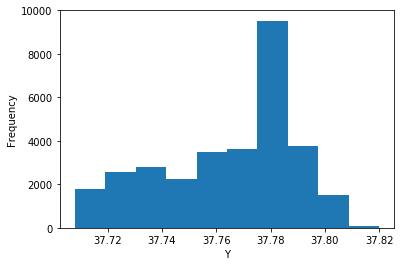

DRUNKENNESS


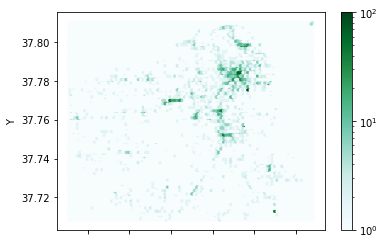

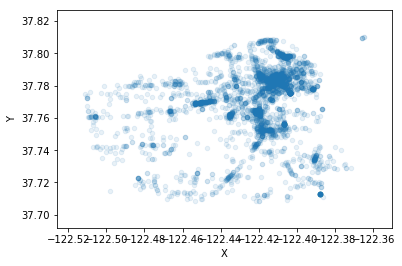

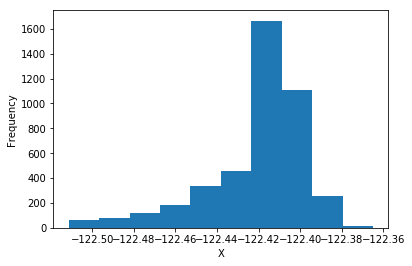

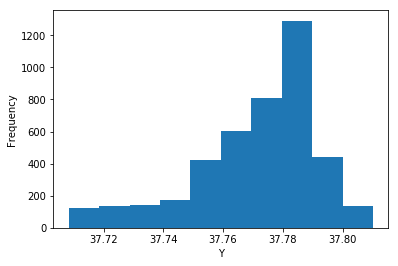

FORGERY/COUNTERFEITING


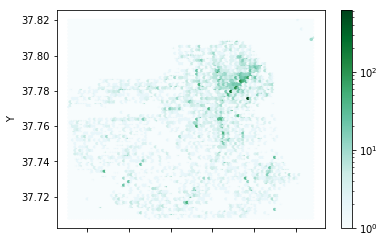

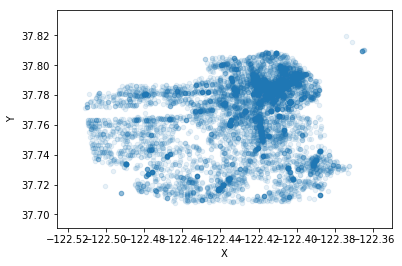

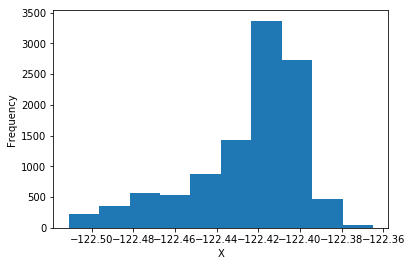

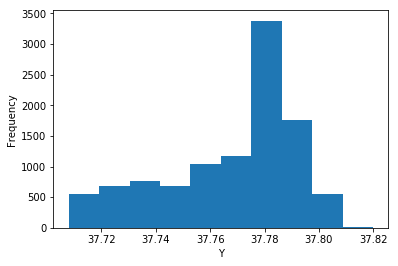

DRUG/NARCOTIC


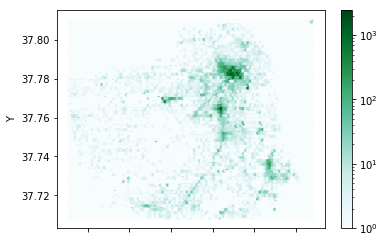

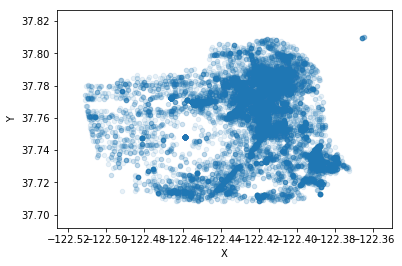

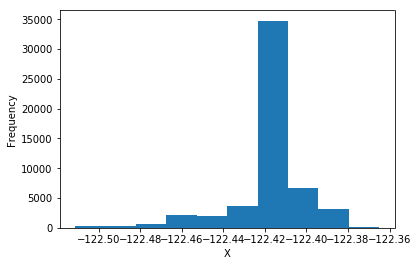

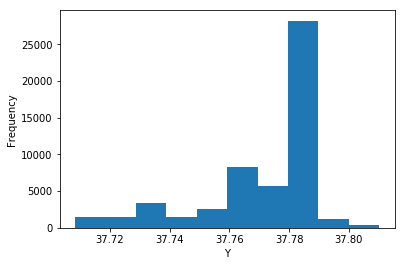

STOLEN PROPERTY


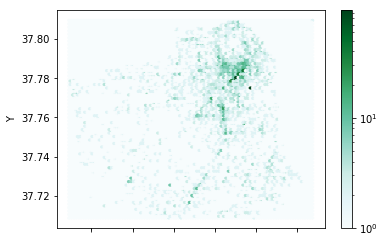

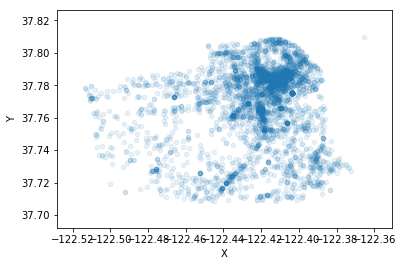

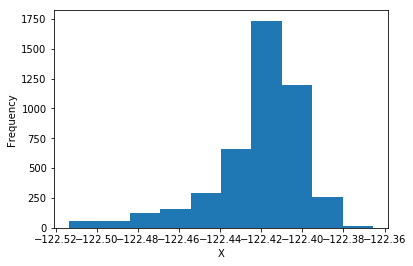

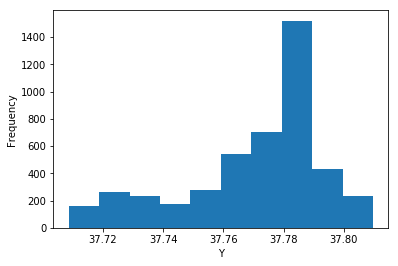

SECONDARY CODES


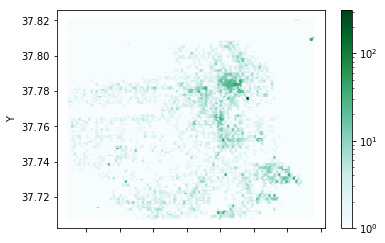

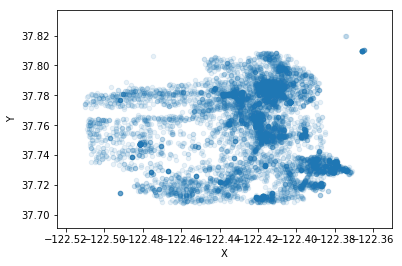

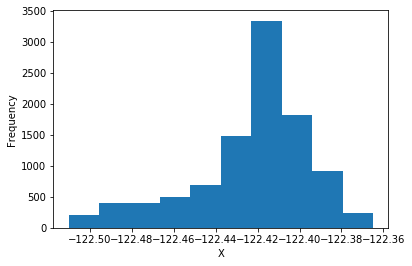

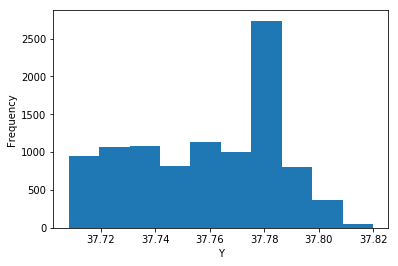

TRESPASS


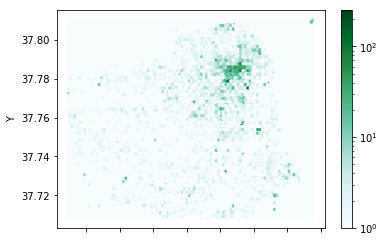

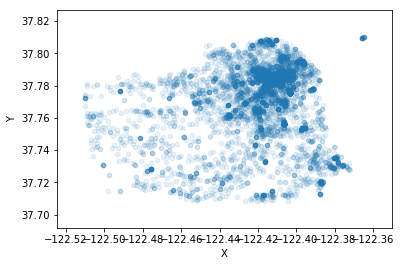

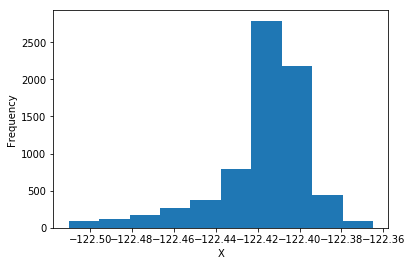

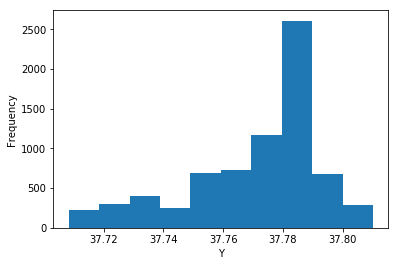

MISSING PERSON


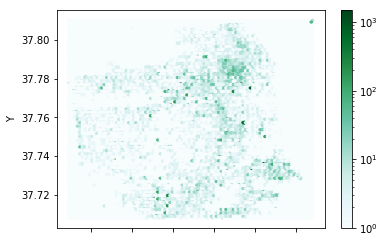

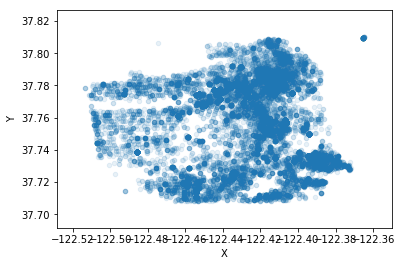

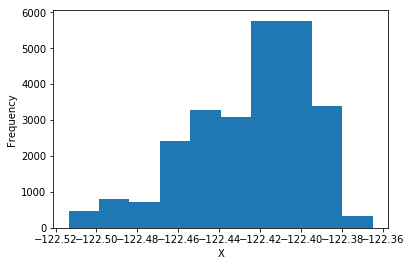

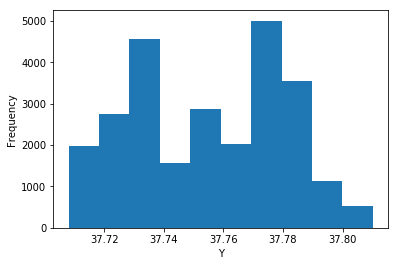

FRAUD


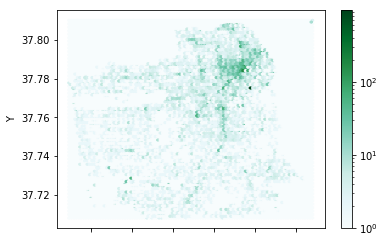

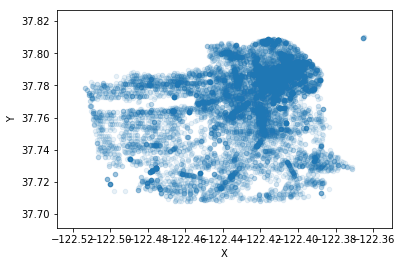

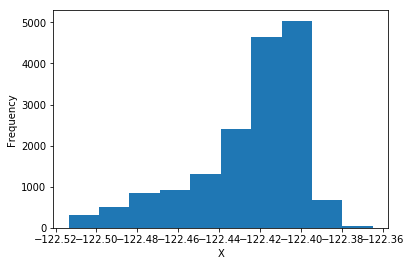

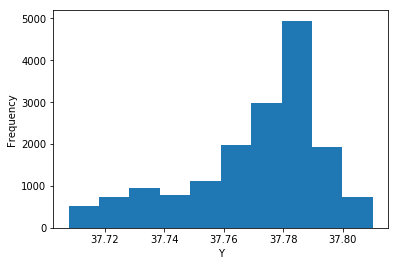

KIDNAPPING


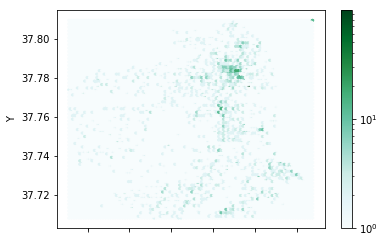

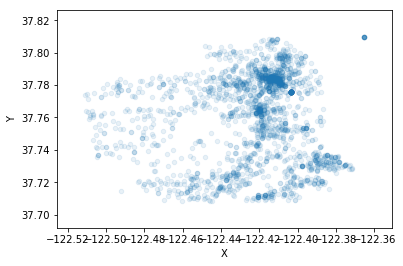

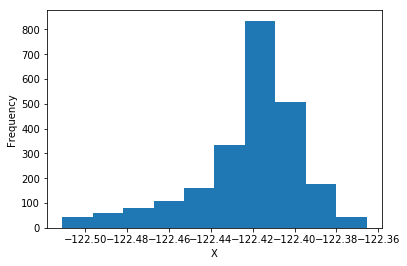

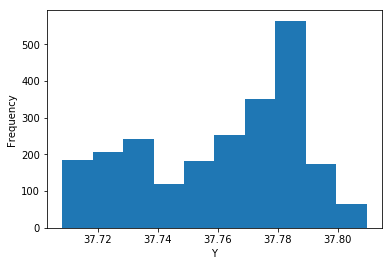

RUNAWAY


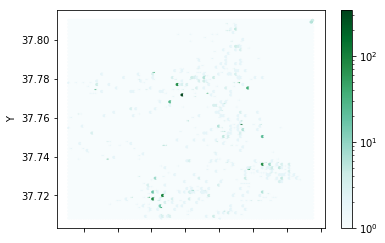

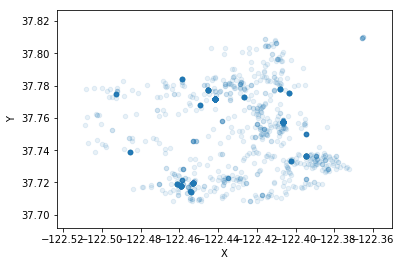

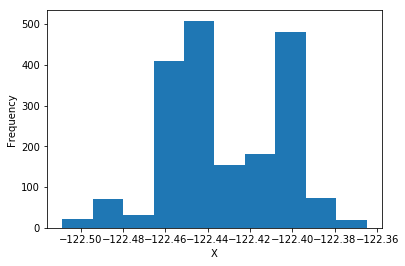

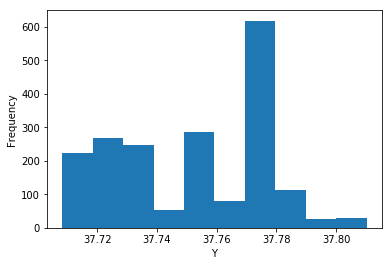

DRIVING UNDER THE INFLUENCE


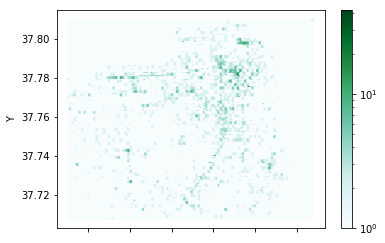

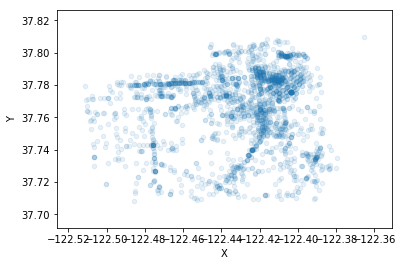

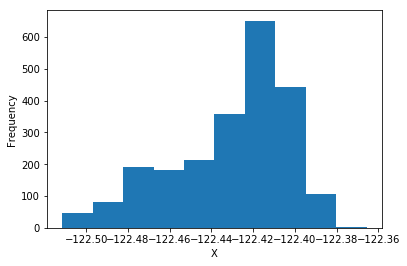

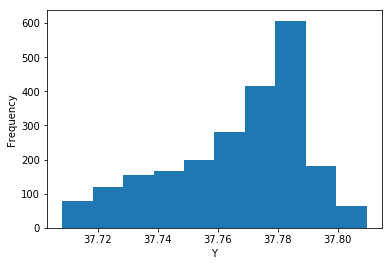

SEX OFFENSES FORCIBLE


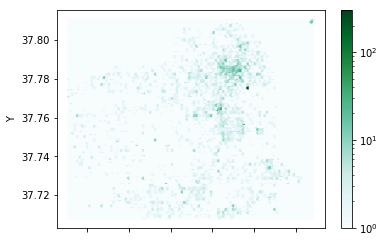

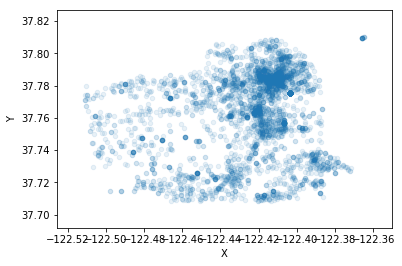

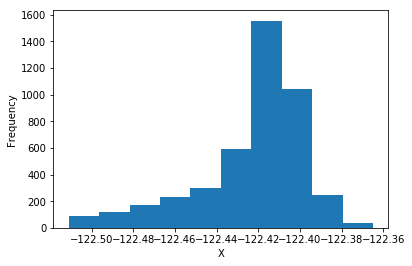

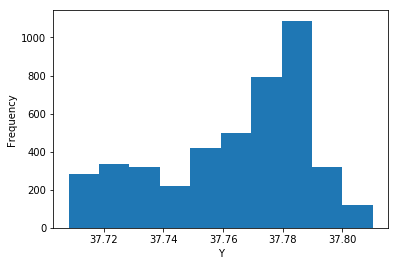

PROSTITUTION


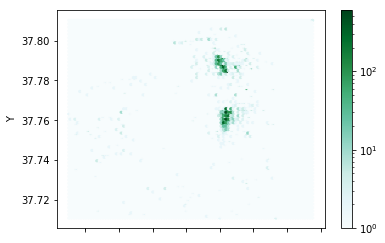

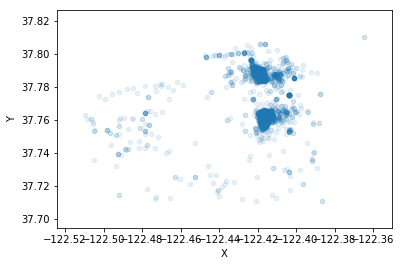

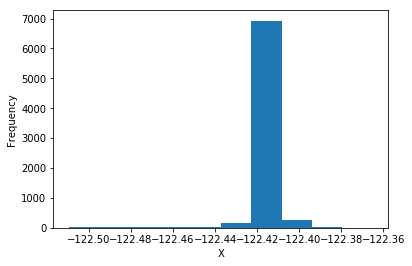

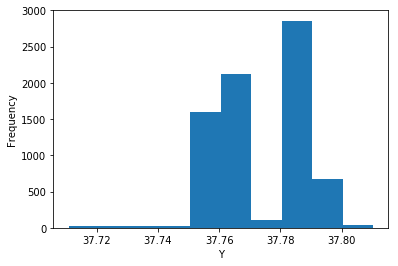

DISORDERLY CONDUCT


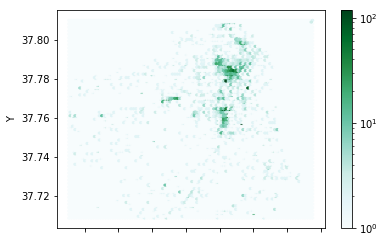

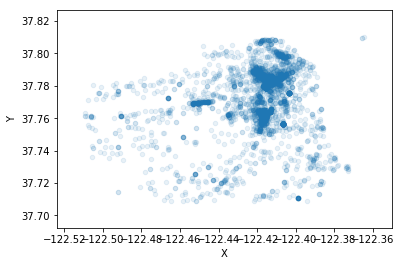

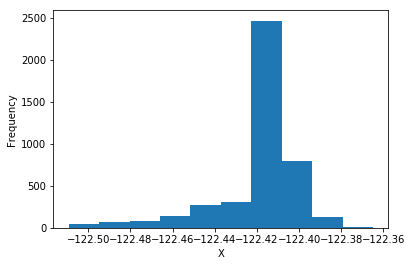

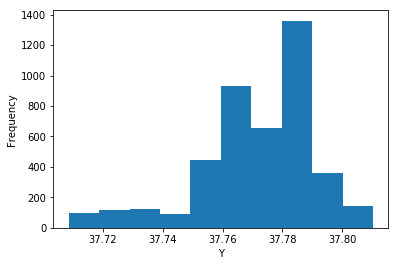

ARSON


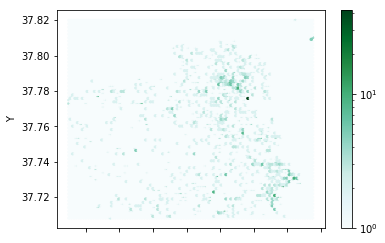

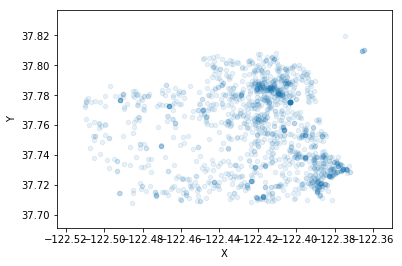

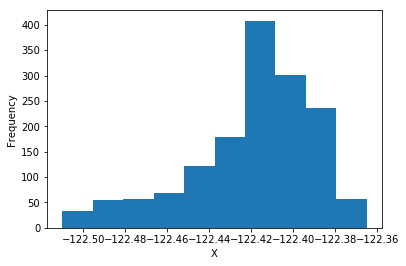

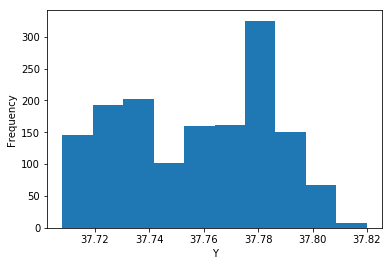

FAMILY OFFENSES


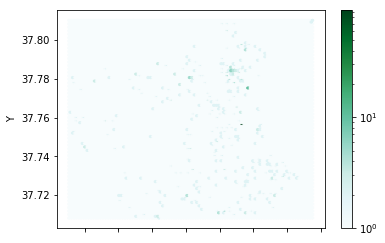

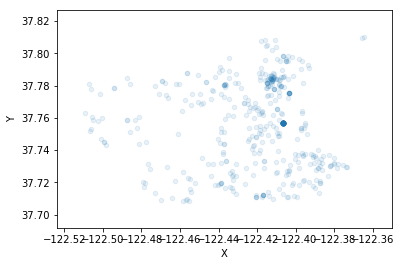

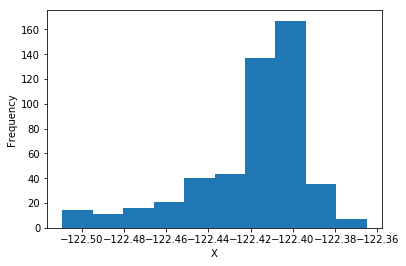

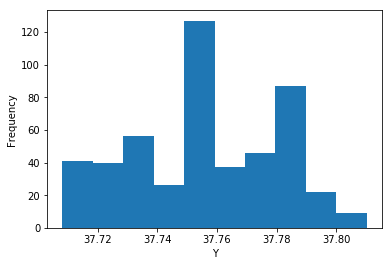

LIQUOR LAWS


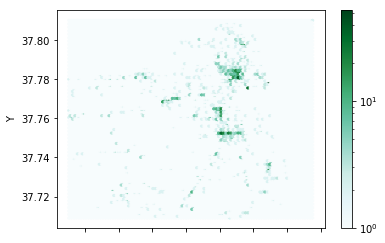

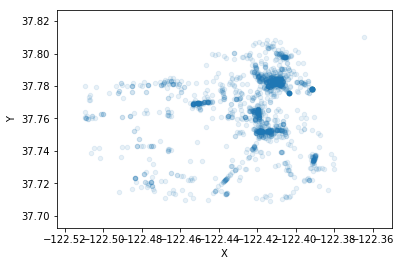

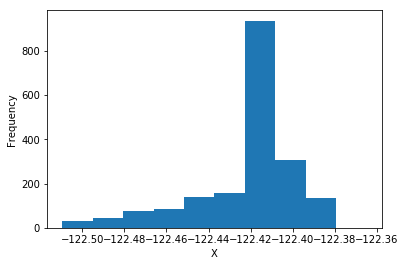

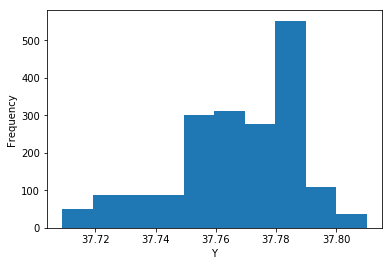

BRIBERY


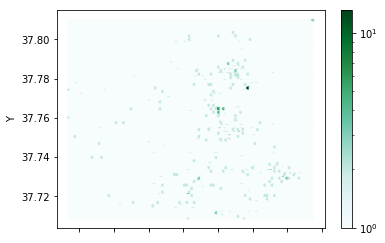

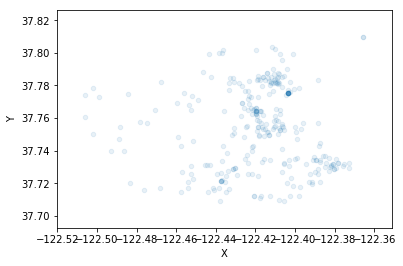

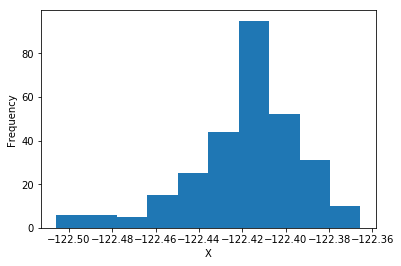

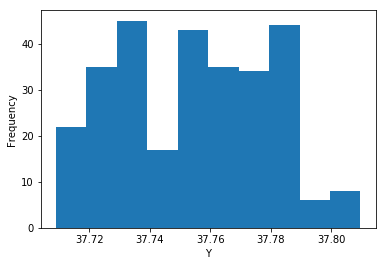

EMBEZZLEMENT


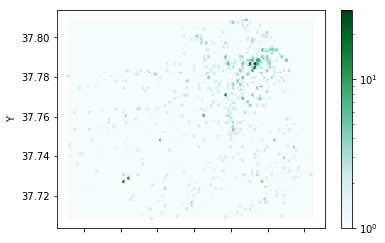

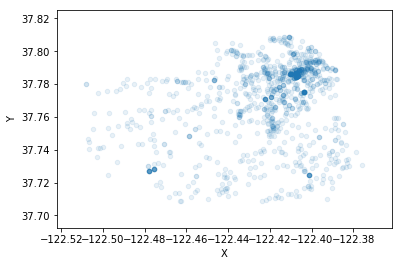

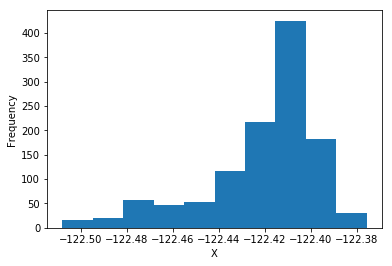

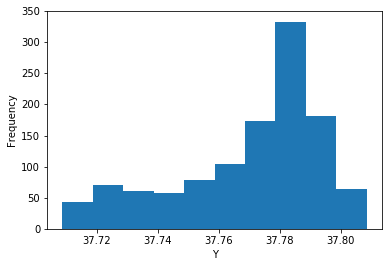

SUICIDE


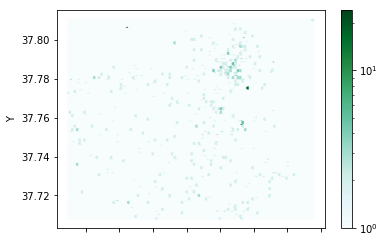

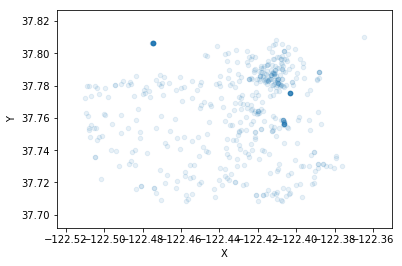

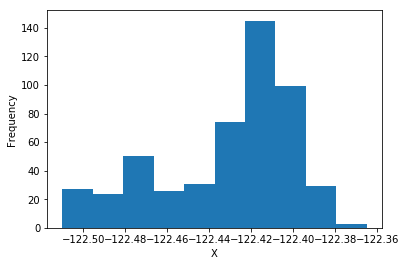

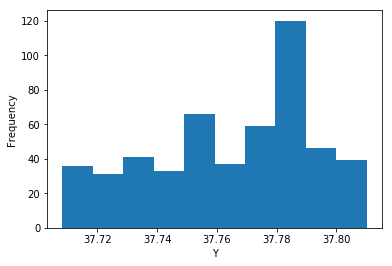

LOITERING


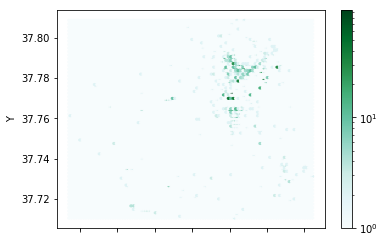

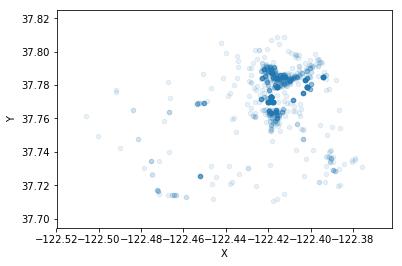

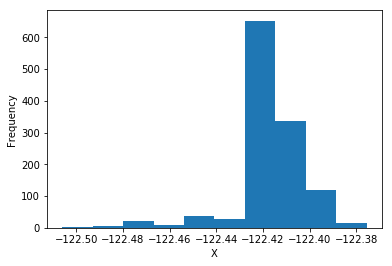

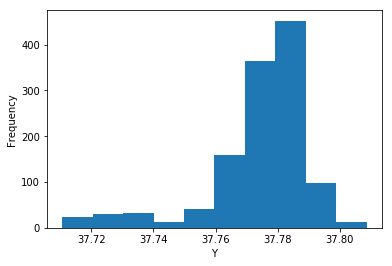

SEX OFFENSES NON FORCIBLE


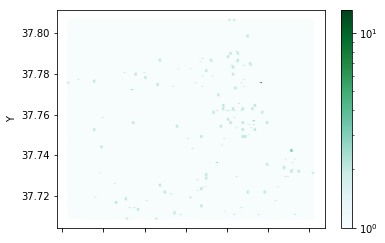

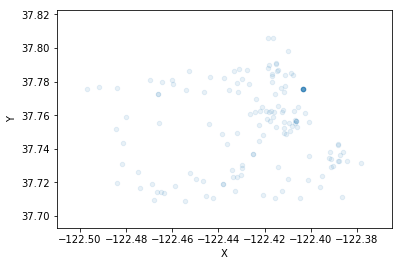

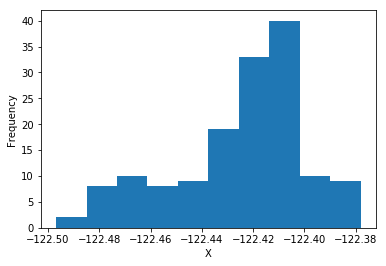

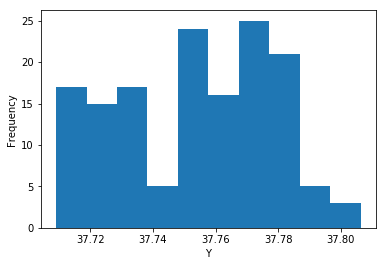

EXTORTION


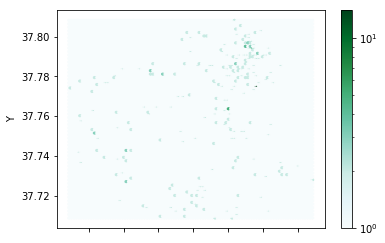

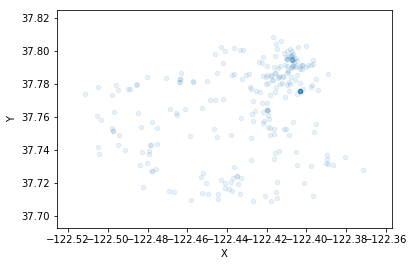

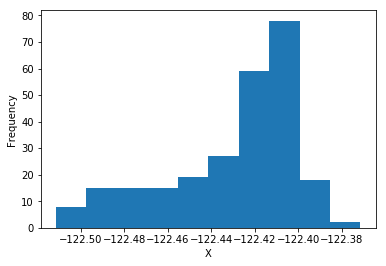

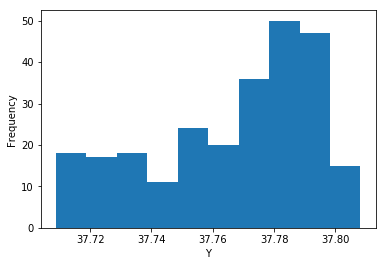

GAMBLING


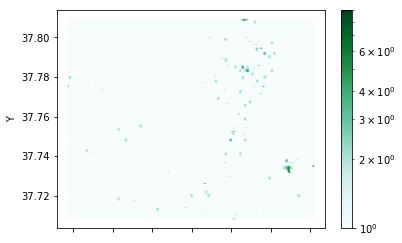

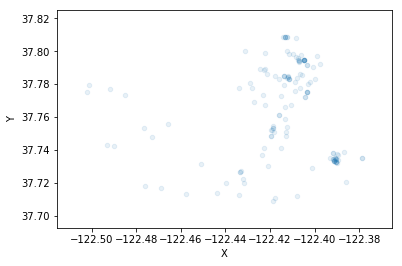

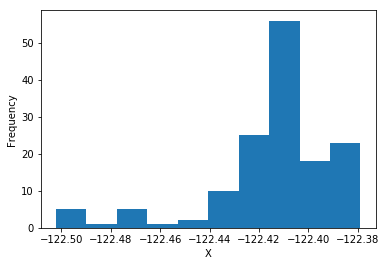

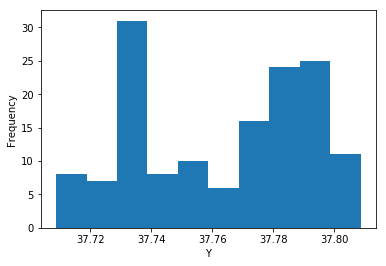

BAD CHECKS


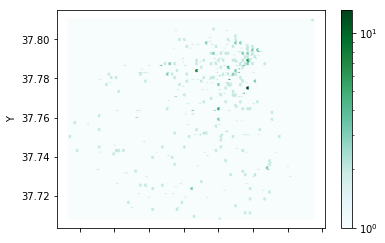

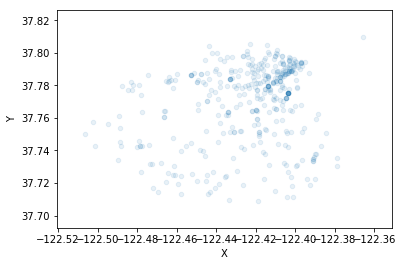

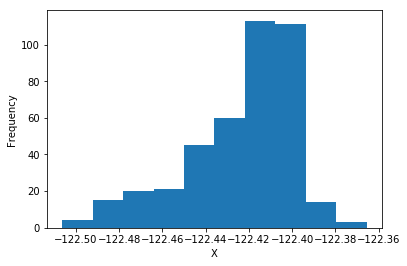

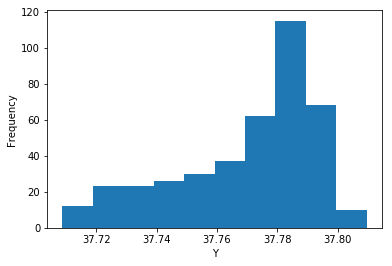

TREA


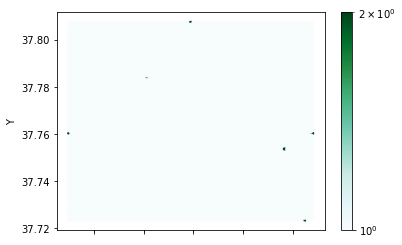

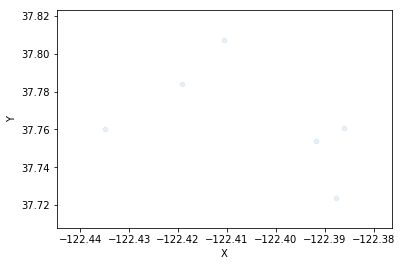

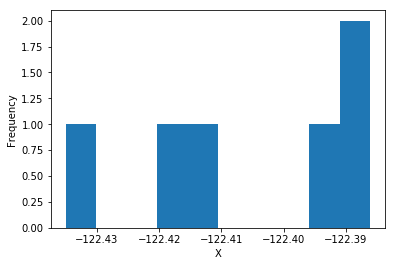

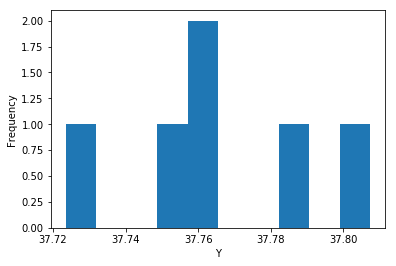

RECOVERED VEHICLE


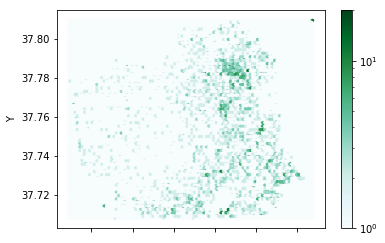

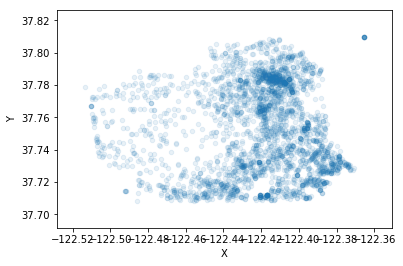

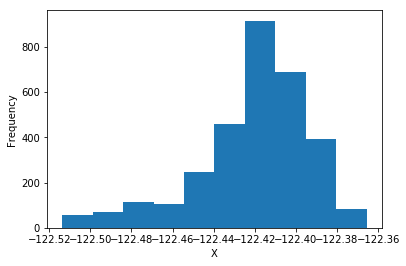

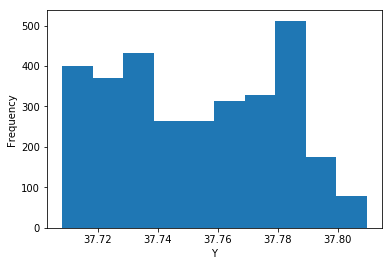

PORNOGRAPHY/OBSCENE MAT


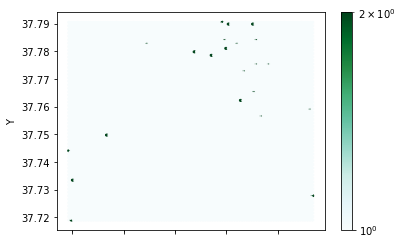

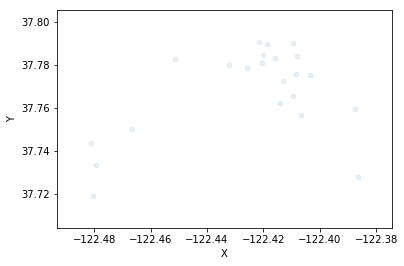

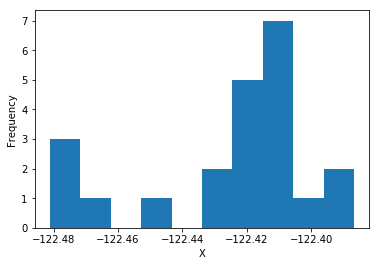

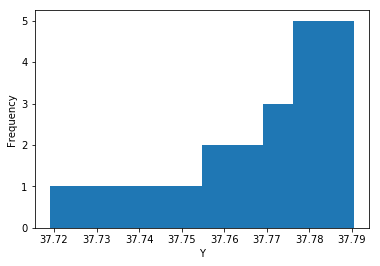

In [56]:
cats = train_pd.Category.unique()
city = train_pd[["Category", "X", "Y"]].query("Y < 50")
for cat in cats:
    print("============")
    print(cat)
    temp = city.query("Category == @cat")
    ax = temp.plot(kind = "hexbin", x = "X", y = "Y", bins = "log")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()
    ax = temp.plot(kind = "scatter", x = "X", y = "Y", alpha = 0.1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()
    ax = temp.X.plot(kind = "hist", x = "X")
    ax.set_xlabel("X")
    plt.show()
    ax = temp.Y.plot(kind = "hist", x = "Y")
    ax.set_xlabel("Y")
    plt.show()

# Date-related features and Category

* the end of months, i.e. day 31, is short of records because not all months have 31 days
* the last year is apparently short of records; we may want to oversample 2015
* there are some overall trends in the increase and decrease of certain kinds of crime over the years, but probably not useful for classification
* the pattern in hour of day might be useful, i.e. different crimes peak at different hours
* the delta features don't appear to be showing any useful pattern
* the is_holiday and is_weekend features by themselves don't seem to have much pattern

hour_of_day


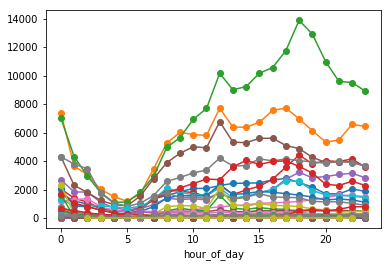

day_of_month


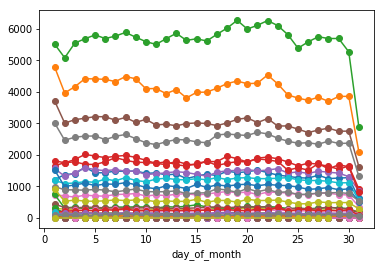

week_of_year


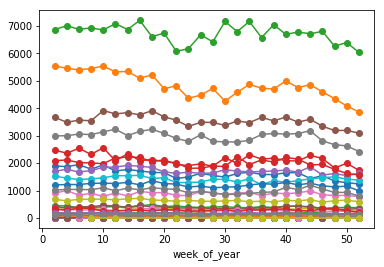

month_of_year


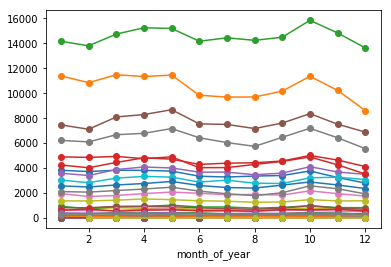

quarter_of_year


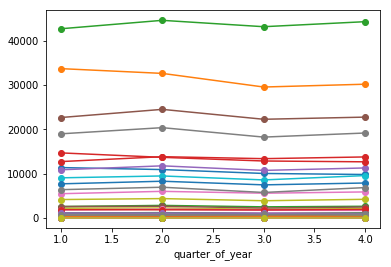

year


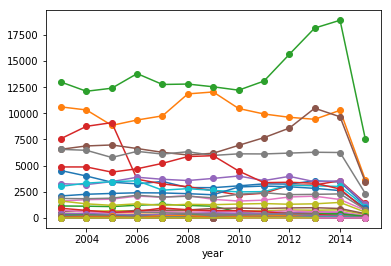

In [87]:
cats = train_pd.Category.unique()
fts = ["hour_of_day", "day_of_month", "week_of_year", "month_of_year", "quarter_of_year", "year"]
crimes = train_pd[["Category"] + fts]
for ft in fts:
    print("============")
    print(ft)
    for cat in cats:
        temp = crimes.query("Category == @cat").groupby([ft]).size()
        ax = temp.plot(marker = "o")
    plt.show()

hour_delta


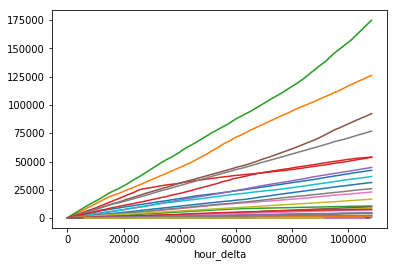

day_delta


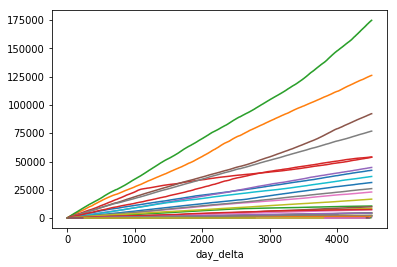

week_delta


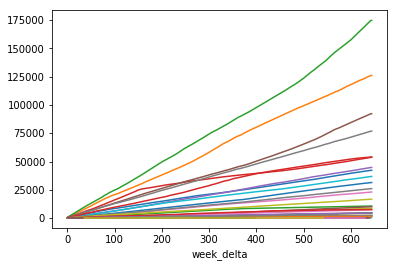

month_delta


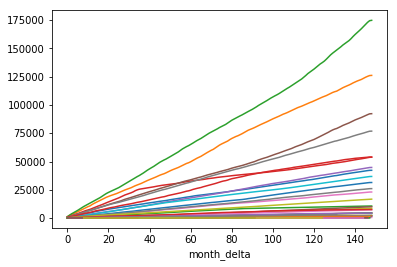

year_delta


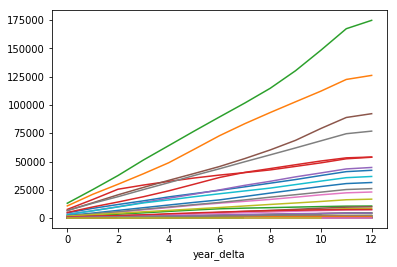

In [92]:
cats = train_pd.Category.unique()
fts = ["hour_delta", "day_delta", "week_delta", "month_delta", "year_delta"]
crimes = train_pd[["Category"] + fts]
for ft in fts:
    print("============")
    print(ft)
    for cat in cats:
        temp = crimes.query("Category == @cat").groupby([ft]).size().cumsum()
        ax = temp.plot()
    plt.show()

In [93]:
train_pd.groupby(["year"]).size()

year
2003    73902
2004    73422
2005    70779
2006    69909
2007    68015
2008    70174
2009    69000
2010    66542
2011    66619
2012    71731
2013    75606
2014    74766
2015    27584
dtype: int64

In [94]:
test_pd.groupby(["year"]).size()

year
2003    75275
2004    74726
2005    71407
2006    67944
2007    69625
2008    71137
2009    70862
2010    66986
2011    66084
2012    69141
2013    77225
2014    75419
2015    28431
dtype: int64

is_weekend and WARRANTS


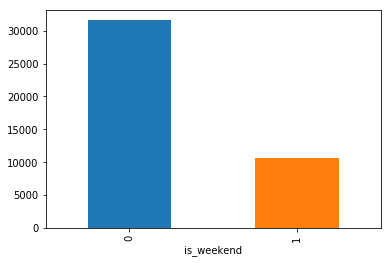

is_weekend and OTHER OFFENSES


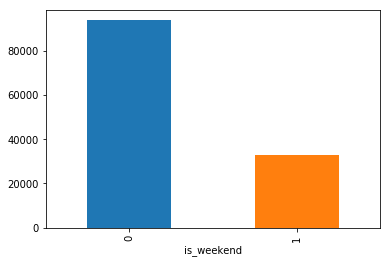

is_weekend and LARCENY/THEFT


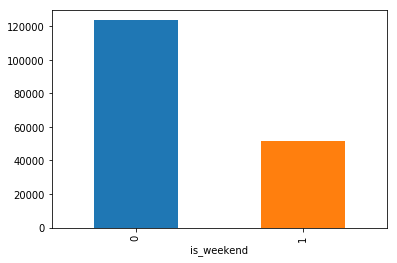

is_weekend and VEHICLE THEFT


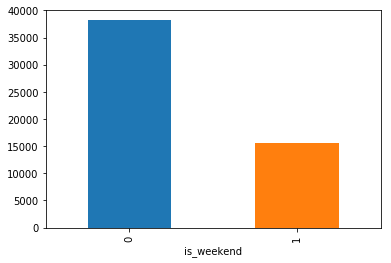

is_weekend and VANDALISM


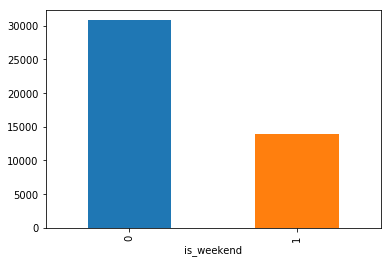

is_weekend and NON-CRIMINAL


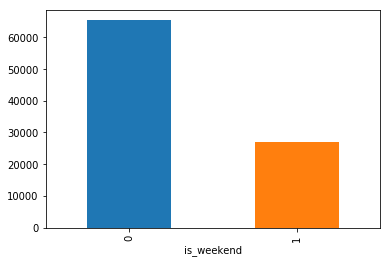

is_weekend and ROBBERY


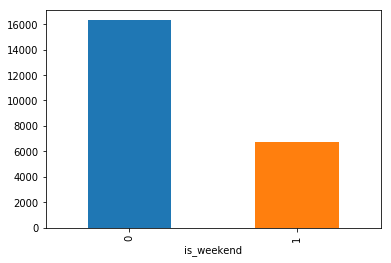

is_weekend and ASSAULT


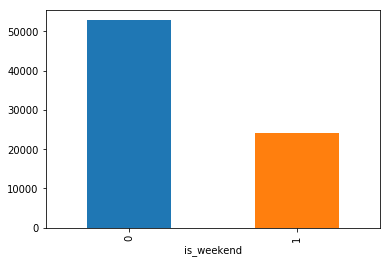

is_weekend and WEAPON LAWS


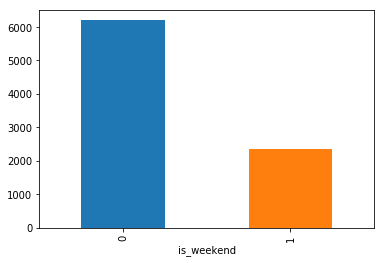

is_weekend and BURGLARY


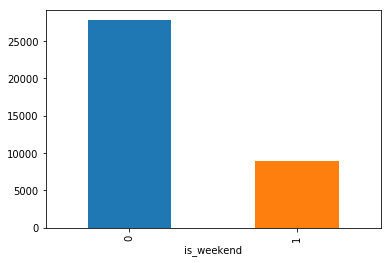

is_weekend and SUSPICIOUS OCC


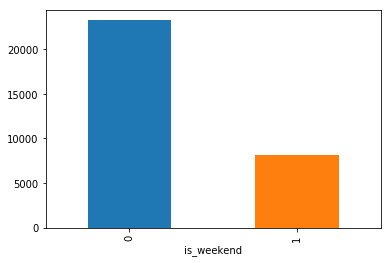

is_weekend and DRUNKENNESS


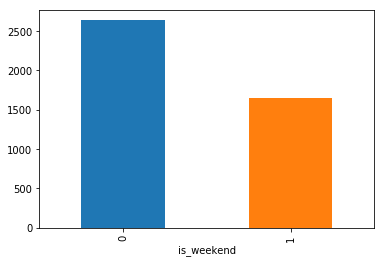

is_weekend and FORGERY/COUNTERFEITING


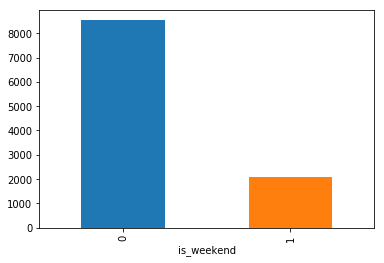

is_weekend and DRUG/NARCOTIC


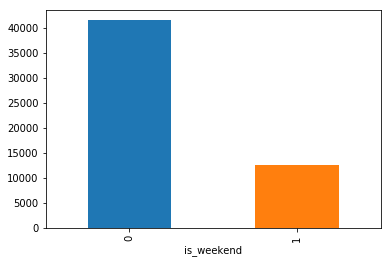

is_weekend and STOLEN PROPERTY


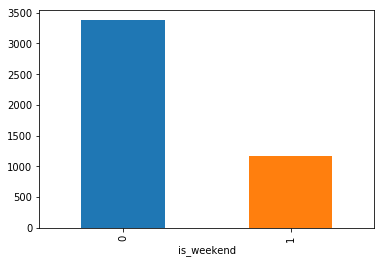

is_weekend and SECONDARY CODES


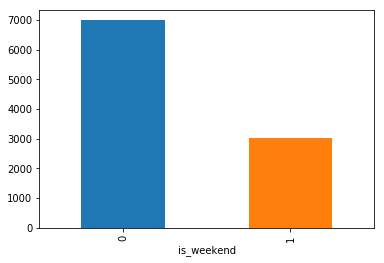

is_weekend and TRESPASS


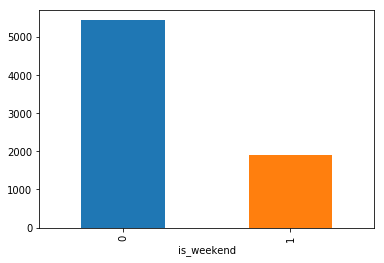

is_weekend and MISSING PERSON


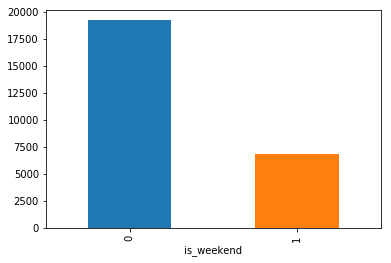

is_weekend and FRAUD


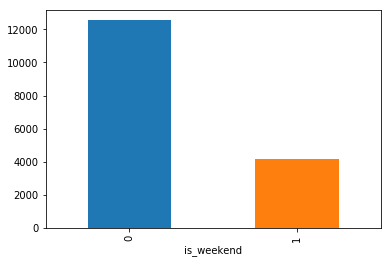

is_weekend and KIDNAPPING


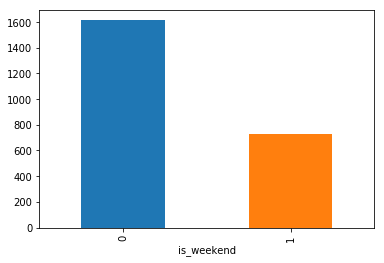

is_weekend and RUNAWAY


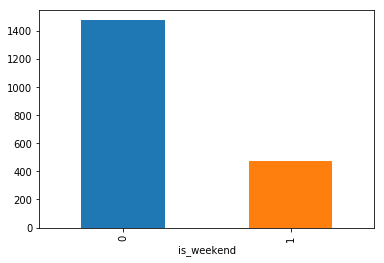

is_weekend and DRIVING UNDER THE INFLUENCE


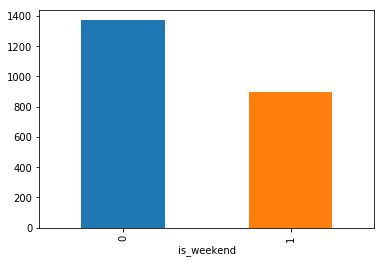

is_weekend and SEX OFFENSES FORCIBLE


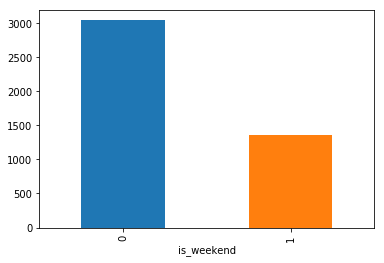

is_weekend and PROSTITUTION


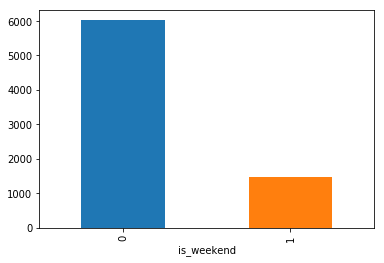

is_weekend and DISORDERLY CONDUCT


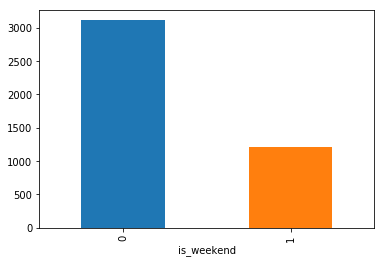

is_weekend and ARSON


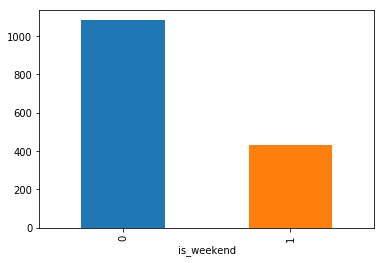

is_weekend and FAMILY OFFENSES


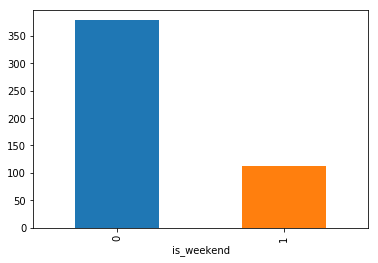

is_weekend and LIQUOR LAWS


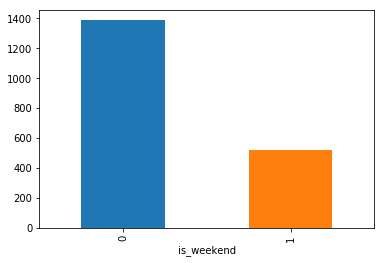

is_weekend and BRIBERY


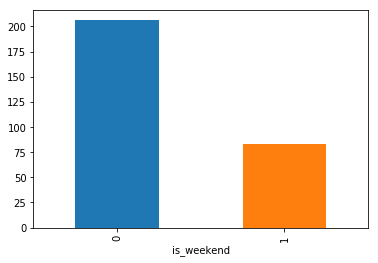

is_weekend and EMBEZZLEMENT


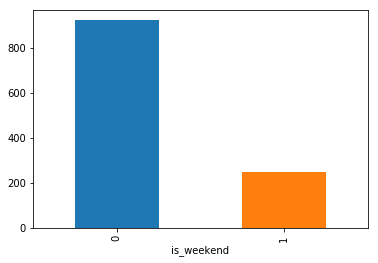

is_weekend and SUICIDE


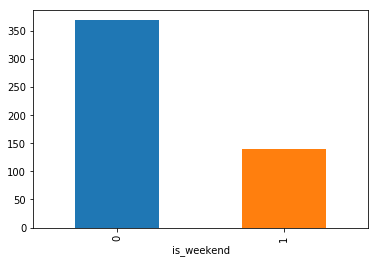

is_weekend and LOITERING


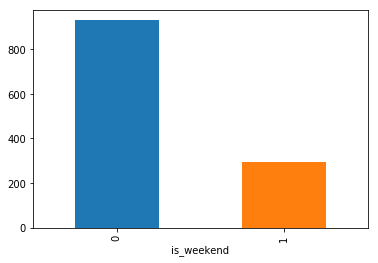

is_weekend and SEX OFFENSES NON FORCIBLE


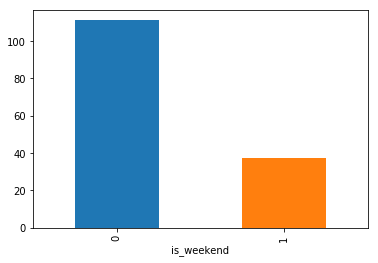

is_weekend and EXTORTION


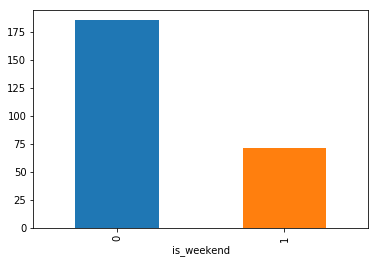

is_weekend and GAMBLING


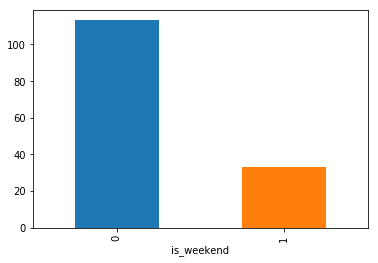

is_weekend and BAD CHECKS


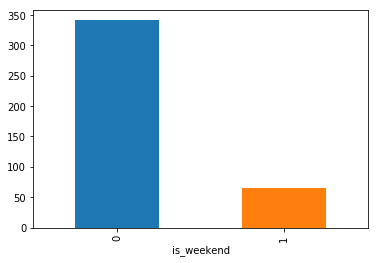

is_weekend and TREA


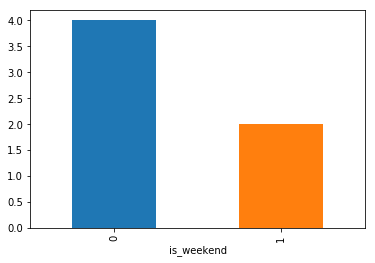

is_weekend and RECOVERED VEHICLE


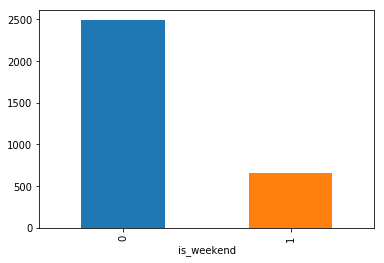

is_weekend and PORNOGRAPHY/OBSCENE MAT


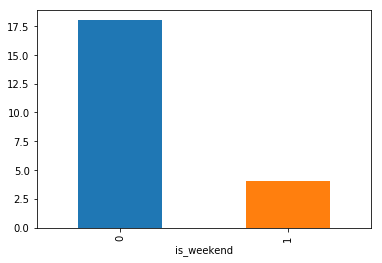

is_holiday and WARRANTS


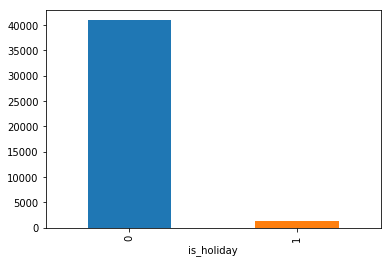

is_holiday and OTHER OFFENSES


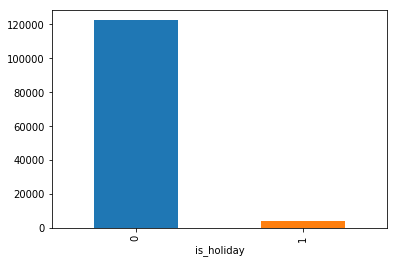

is_holiday and LARCENY/THEFT


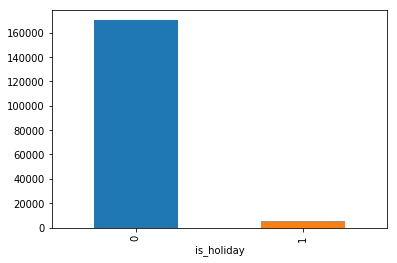

is_holiday and VEHICLE THEFT


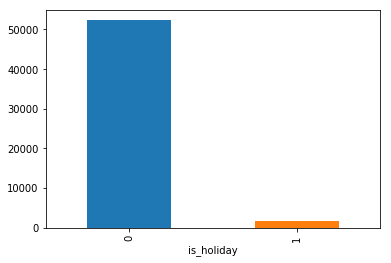

is_holiday and VANDALISM


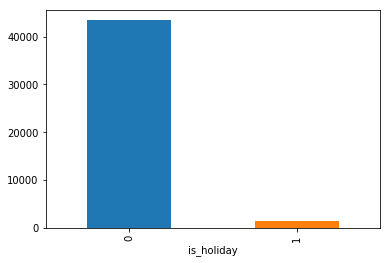

is_holiday and NON-CRIMINAL


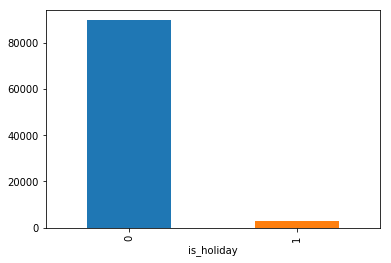

is_holiday and ROBBERY


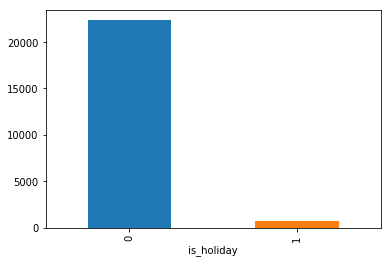

is_holiday and ASSAULT


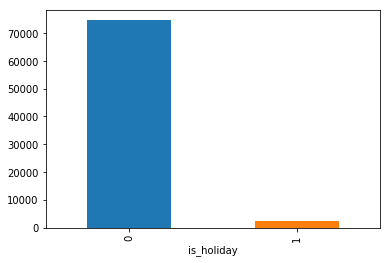

is_holiday and WEAPON LAWS


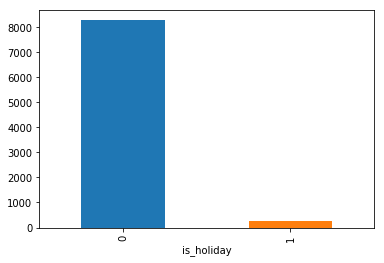

is_holiday and BURGLARY


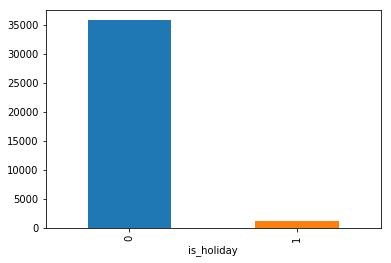

is_holiday and SUSPICIOUS OCC


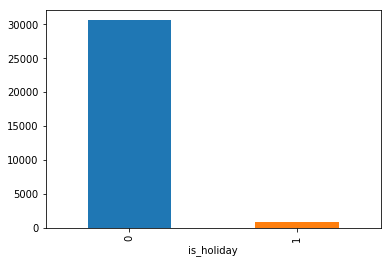

is_holiday and DRUNKENNESS


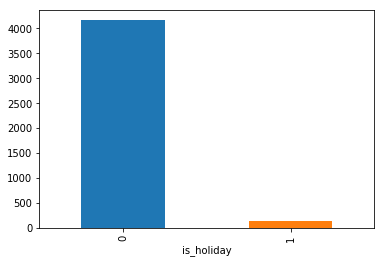

is_holiday and FORGERY/COUNTERFEITING


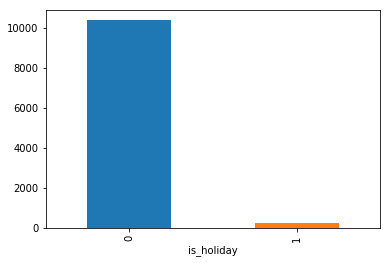

is_holiday and DRUG/NARCOTIC


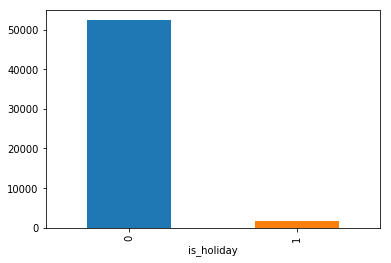

is_holiday and STOLEN PROPERTY


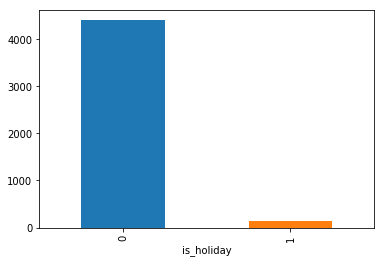

is_holiday and SECONDARY CODES


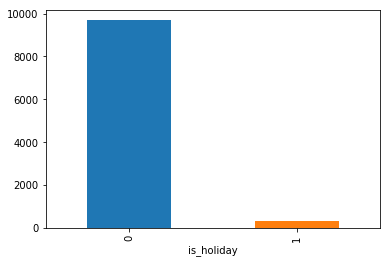

is_holiday and TRESPASS


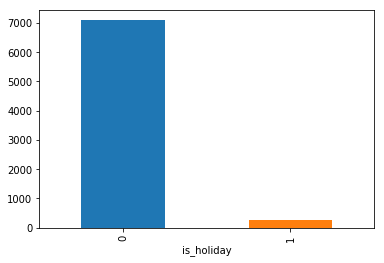

is_holiday and MISSING PERSON


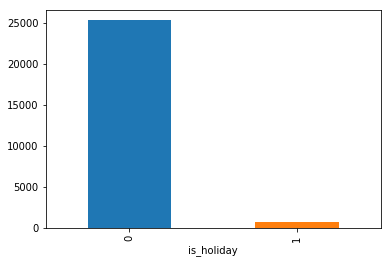

is_holiday and FRAUD


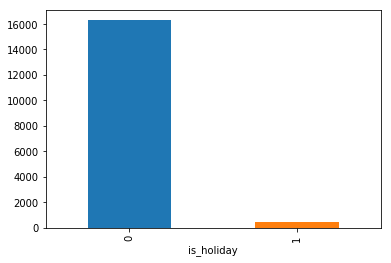

is_holiday and KIDNAPPING


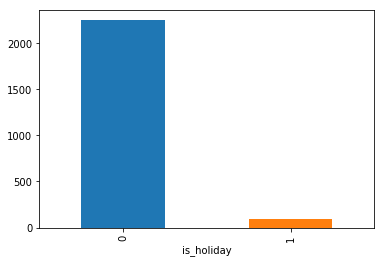

is_holiday and RUNAWAY


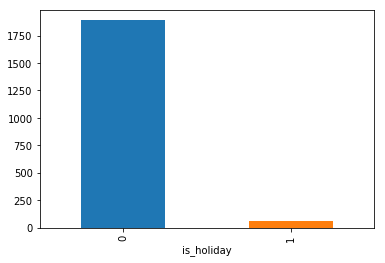

is_holiday and DRIVING UNDER THE INFLUENCE


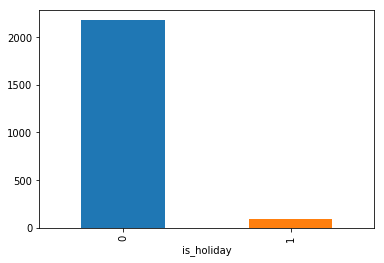

is_holiday and SEX OFFENSES FORCIBLE


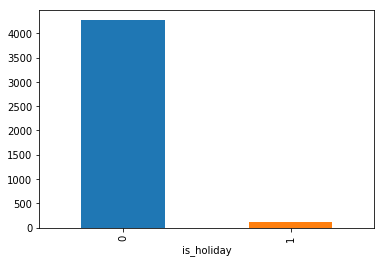

is_holiday and PROSTITUTION


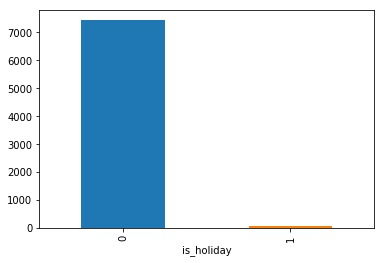

is_holiday and DISORDERLY CONDUCT


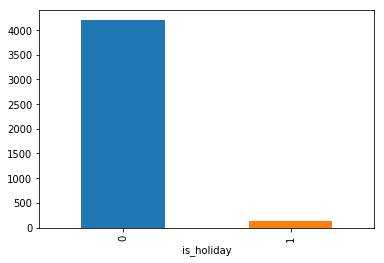

is_holiday and ARSON


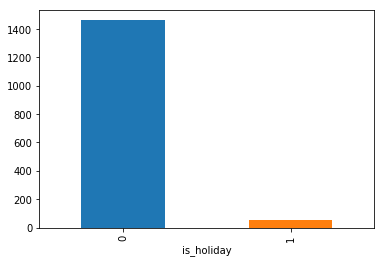

is_holiday and FAMILY OFFENSES


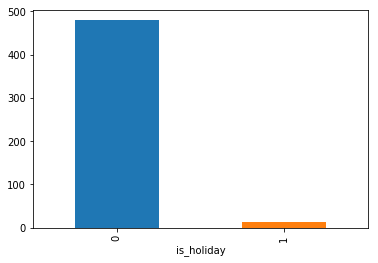

is_holiday and LIQUOR LAWS


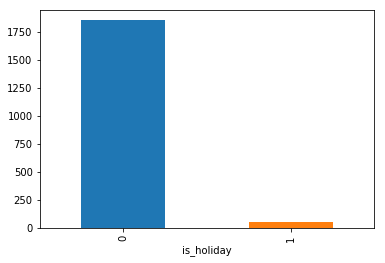

is_holiday and BRIBERY


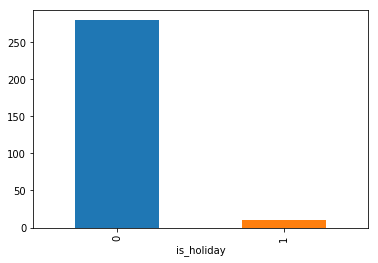

is_holiday and EMBEZZLEMENT


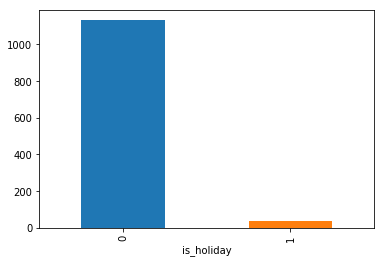

is_holiday and SUICIDE


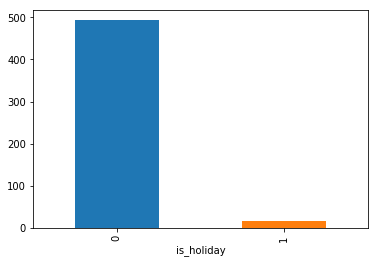

is_holiday and LOITERING


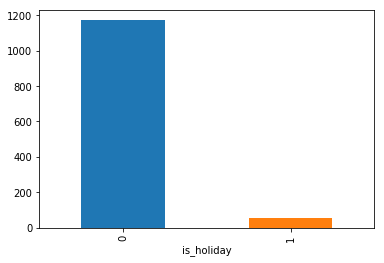

is_holiday and SEX OFFENSES NON FORCIBLE


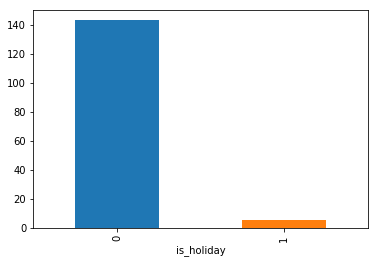

is_holiday and EXTORTION


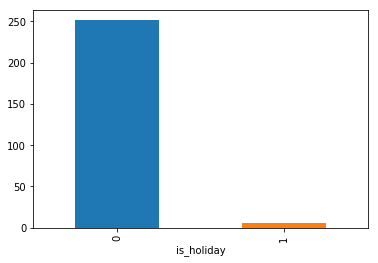

is_holiday and GAMBLING


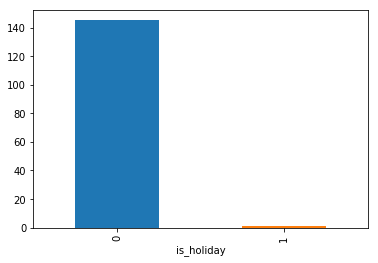

is_holiday and BAD CHECKS


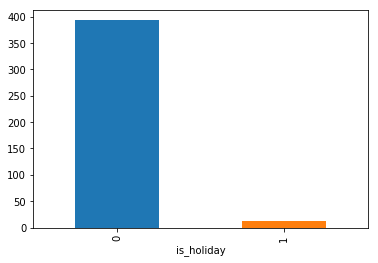

is_holiday and TREA


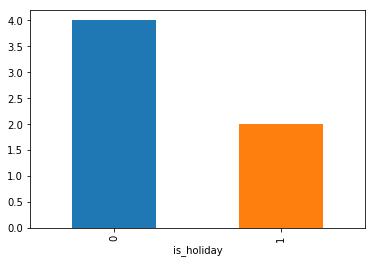

is_holiday and RECOVERED VEHICLE


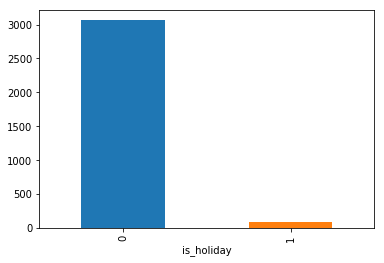

is_holiday and PORNOGRAPHY/OBSCENE MAT


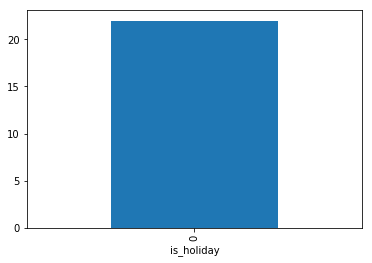

In [104]:
cats = train_pd.Category.unique()
fts = ["is_weekend", "is_holiday"]
crimes = train_pd[["Category"] + fts]
for ft in fts:
    print("============")
    for cat in cats:
        print(ft, "and", cat)
        temp = crimes.query("Category == @cat").groupby([ft]).size()
        ax = temp.plot.bar()
        plt.show()